In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import FeetMamitas
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import FCN
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
FeetMamitas()

100%|██████████| 35.4M/35.4M [00:03<00:00, 11.5MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/feet-mamitas/versions/3
Dataset copied to: /content/datasets/feet-mamitas
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/feet-mamitas/versions/3' deleted.


'/content/datasets/feet-mamitas'

In [ ]:
config = {"Dir of dataset": "./datasets/feet-mamitas", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "FCN", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","FeetMamitas-FCN-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 248


Organizing masks: 100%|██████████| 248/248 [00:00<00:00, 161419.52it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 71


Organizing masks: 100%|██████████| 71/71 [00:00<00:00, 132118.72it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 35


Organizing masks: 100%|██████████| 35/35 [00:00<00:00, 107625.10it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


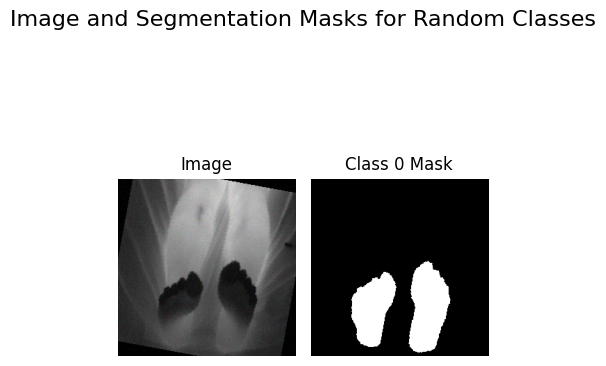

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 146MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


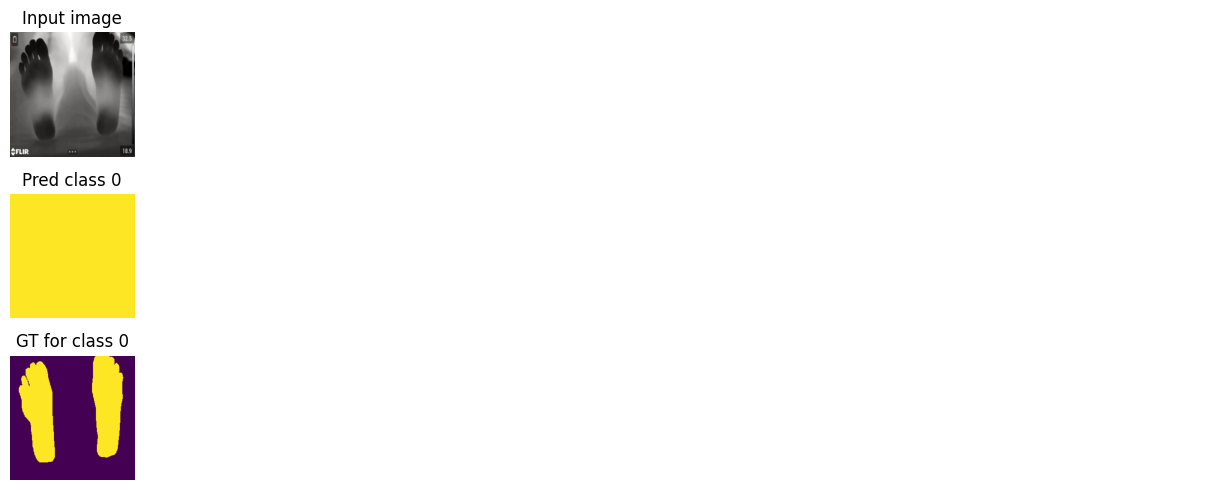

Train loss: 0.64917 | Time: 0m 6s | Val loss: 0.63621
Train_DICE_avg: 0.38182 | Train_Jaccard_avg: 0.24360 | Train_Sensitivity_avg: 0.24360 | Train_Specificity_avg: 0.83925 
Class 0 - Train_DICE: 0.38182 | Train_Jaccard: 0.24360 | Train_Sensitivity: 0.24360 | Train_Specificity: 0.83925 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.64793 | Time: 0m 11s | Val loss: 0.63614
Train_DICE_avg: 0.38173 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 0.97619 
Class 0 - Train_DICE: 0.38173 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 0.97619 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


Train loss: 0.64683 | Time: 0m 15s | Val loss: 0.63604
Train_DICE_avg: 0.38180 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38180 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.64590 | Time: 0m 20s | Val loss: 0.63592
Train_DICE_avg: 0.38183 | Train_Jaccard_avg: 0.24359 | Train_Sensitivity_avg: 0.24359 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38183 | Train_Jaccard: 0.24359 | Train_Sensitivity: 0.24359 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.64517 | Time: 0m 24s | Val loss: 0.63575
Train_DICE_avg: 0.38175 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38175 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


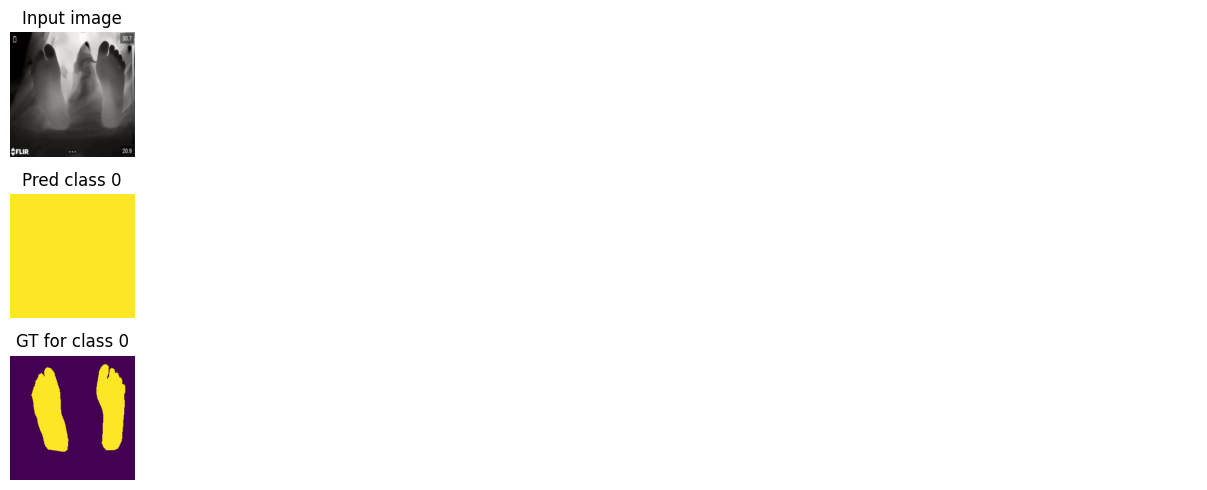

Train loss: 0.64445 | Time: 0m 29s | Val loss: 0.63546
Train_DICE_avg: 0.38171 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38171 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.64350 | Time: 0m 33s | Val loss: 0.63503
Train_DICE_avg: 0.38186 | Train_Jaccard_avg: 0.24362 | Train_Sensitivity_avg: 0.24362 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38186 | Train_Jaccard: 0.24362 | Train_Sensitivity: 0.24362 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.64281 | Time: 0m 38s | Val loss: 0.63436
Train_DICE_avg: 0.38174 | Train_Jaccard_avg: 0.24351 | Train_Sensitivity_avg: 0.24351 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38174 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24351 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.64183 | Time: 0m 42s | Val loss: 0.63341
Train_DICE_avg: 0.38181 | Train_Jaccard_avg: 0.24358 | Train_Sensitivity_avg: 0.24358 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38181 | Train_Jaccard: 0.24358 | Train_Sensitivity: 0.24358 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.64101 | Time: 0m 47s | Val loss: 0.63210
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


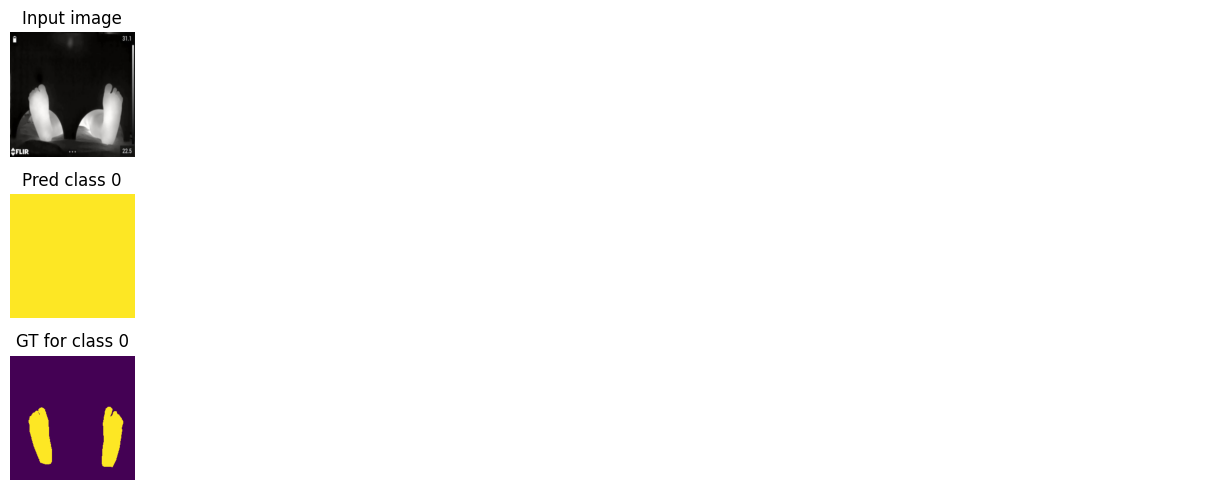

Train loss: 0.64014 | Time: 0m 51s | Val loss: 0.63064
Train_DICE_avg: 0.38156 | Train_Jaccard_avg: 0.24335 | Train_Sensitivity_avg: 0.24335 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38156 | Train_Jaccard: 0.24335 | Train_Sensitivity: 0.24335 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.63885 | Time: 0m 56s | Val loss: 0.62902
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24348 | Train_Sensitivity_avg: 0.24348 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24348 | Train_Sensitivity: 0.24348 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.63791 | Time: 1m 1s | Val loss: 0.62745
Train_DICE_avg: 0.38171 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38171 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.63667 | Time: 1m 5s | Val loss: 0.62590
Train_DICE_avg: 0.38177 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38177 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.63539 | Time: 1m 10s | Val loss: 0.62441
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


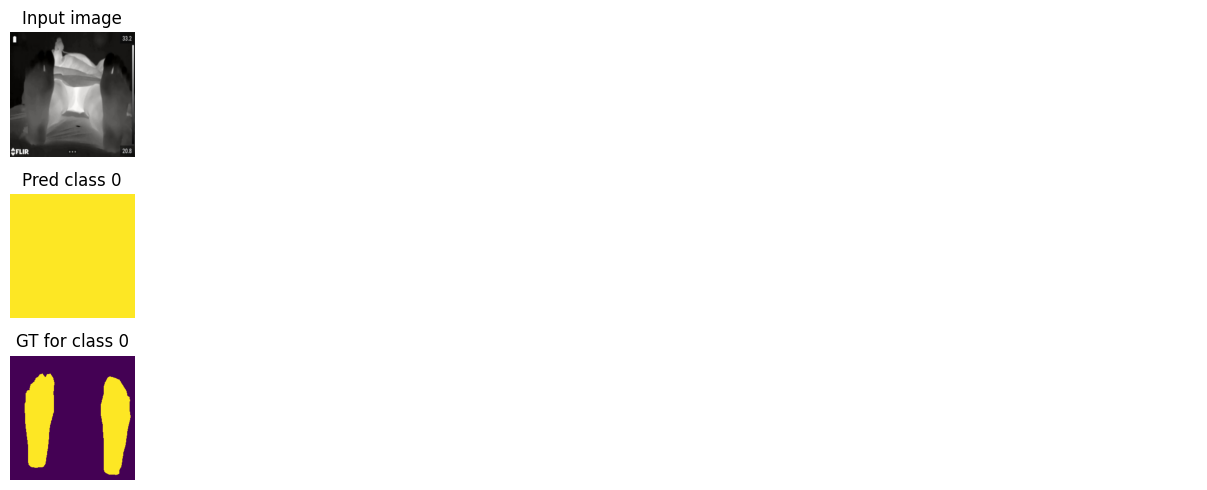

Train loss: 0.63419 | Time: 1m 15s | Val loss: 0.62298
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.63305 | Time: 1m 19s | Val loss: 0.62153
Train_DICE_avg: 0.38169 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38169 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.63188 | Time: 1m 24s | Val loss: 0.62020
Train_DICE_avg: 0.38171 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38171 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


Train loss: 0.63063 | Time: 1m 28s | Val loss: 0.61890
Train_DICE_avg: 0.38174 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38174 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.62937 | Time: 1m 33s | Val loss: 0.61762
Train_DICE_avg: 0.38185 | Train_Jaccard_avg: 0.24362 | Train_Sensitivity_avg: 0.24362 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38185 | Train_Jaccard: 0.24362 | Train_Sensitivity: 0.24362 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


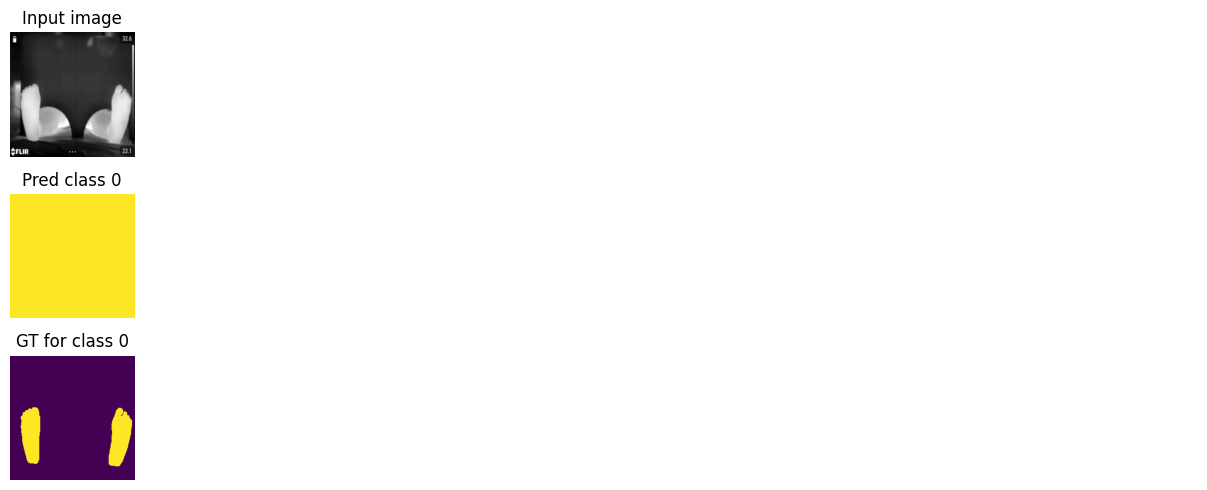

Train loss: 0.62813 | Time: 1m 38s | Val loss: 0.61606
Train_DICE_avg: 0.38182 | Train_Jaccard_avg: 0.24359 | Train_Sensitivity_avg: 0.24359 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38182 | Train_Jaccard: 0.24359 | Train_Sensitivity: 0.24359 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.62685 | Time: 1m 42s | Val loss: 0.61458
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.62549 | Time: 1m 47s | Val loss: 0.61313
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


Train loss: 0.62399 | Time: 1m 51s | Val loss: 0.61173
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Train loss: 0.62262 | Time: 1m 56s | Val loss: 0.61034
Train_DICE_avg: 0.38183 | Train_Jaccard_avg: 0.24361 | Train_Sensitivity_avg: 0.24361 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38183 | Train_Jaccard: 0.24361 | Train_Sensitivity: 0.24361 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


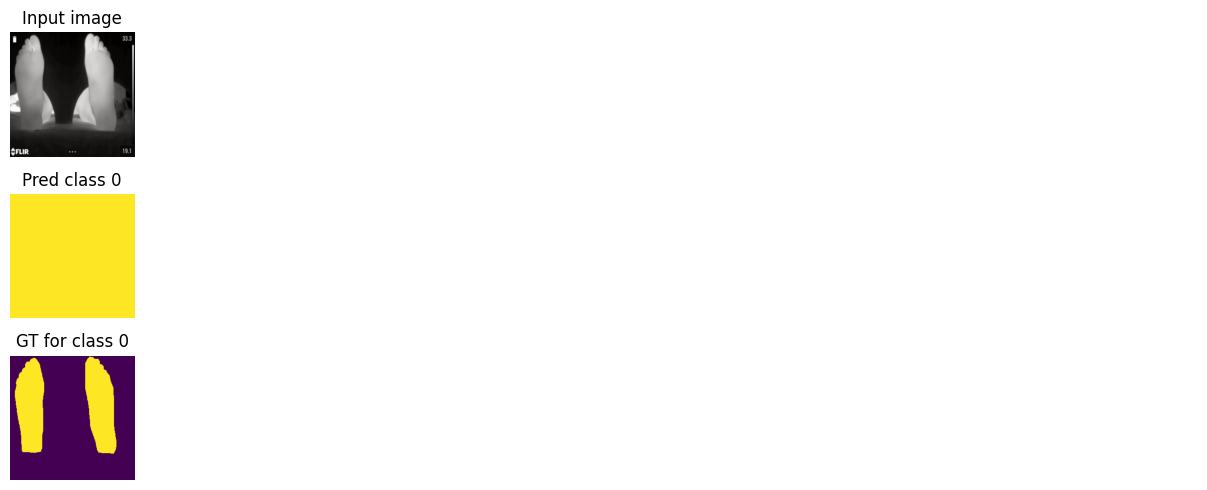

Train loss: 0.62129 | Time: 2m 1s | Val loss: 0.60901
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.61990 | Time: 2m 6s | Val loss: 0.60757
Train_DICE_avg: 0.38174 | Train_Jaccard_avg: 0.24351 | Train_Sensitivity_avg: 0.24351 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38174 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24351 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Train loss: 0.61818 | Time: 2m 10s | Val loss: 0.60616
Train_DICE_avg: 0.38184 | Train_Jaccard_avg: 0.24360 | Train_Sensitivity_avg: 0.24360 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38184 | Train_Jaccard: 0.24360 | Train_Sensitivity: 0.24360 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


Train loss: 0.61707 | Time: 2m 15s | Val loss: 0.60478
Train_DICE_avg: 0.38177 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38177 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


Train loss: 0.61553 | Time: 2m 19s | Val loss: 0.60338
Train_DICE_avg: 0.38187 | Train_Jaccard_avg: 0.24362 | Train_Sensitivity_avg: 0.24362 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38187 | Train_Jaccard: 0.24362 | Train_Sensitivity: 0.24362 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


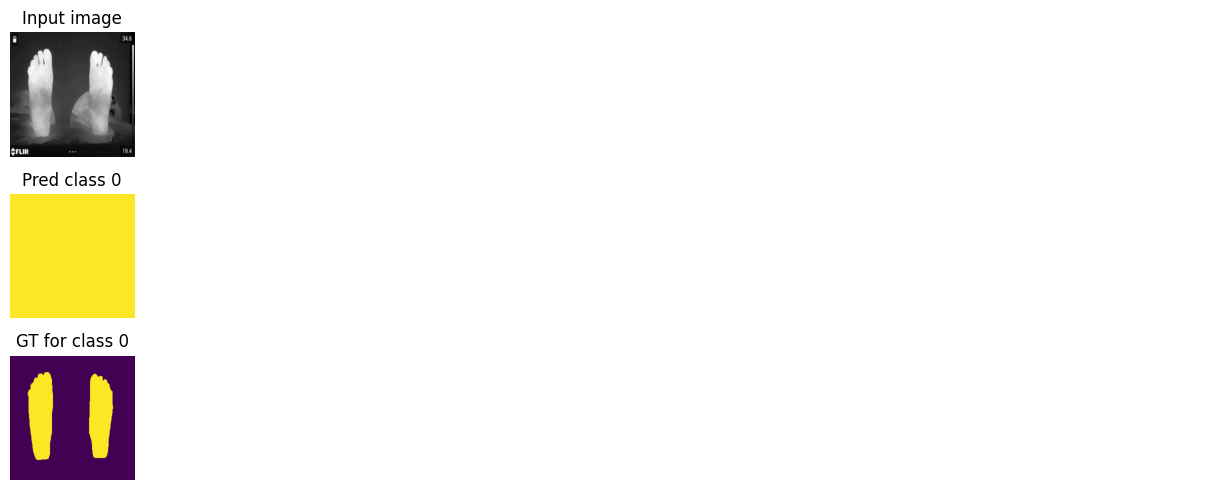

Train loss: 0.61433 | Time: 2m 24s | Val loss: 0.60178
Train_DICE_avg: 0.38179 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38179 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


Train loss: 0.61301 | Time: 2m 29s | Val loss: 0.60007
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24348 | Train_Sensitivity_avg: 0.24348 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24348 | Train_Sensitivity: 0.24348 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.61134 | Time: 2m 33s | Val loss: 0.59853
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.60991 | Time: 2m 38s | Val loss: 0.59711
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.60881 | Time: 2m 42s | Val loss: 0.59594
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


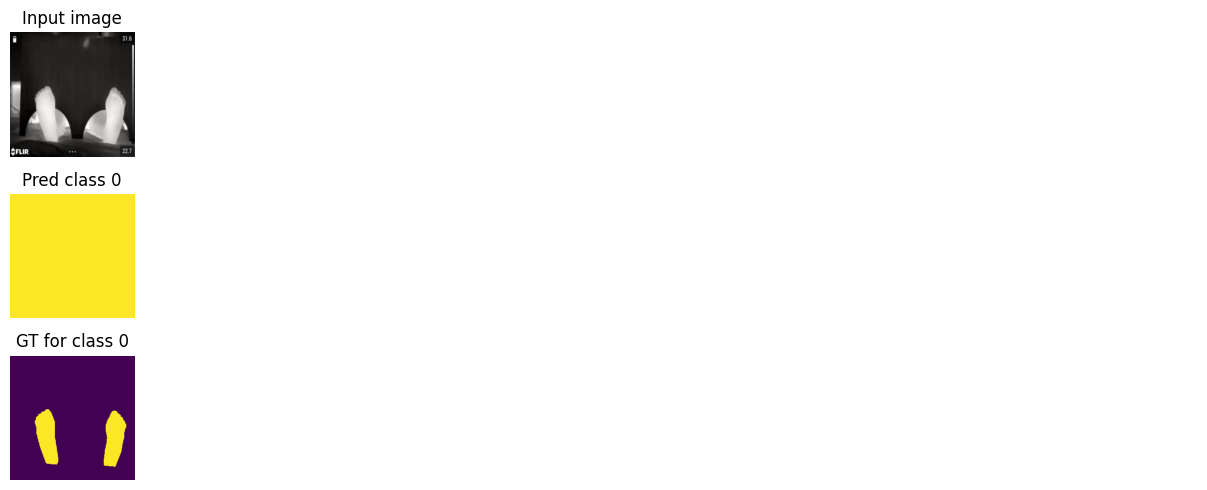

Train loss: 0.60768 | Time: 2m 47s | Val loss: 0.59485
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Train loss: 0.60684 | Time: 2m 52s | Val loss: 0.59388
Train_DICE_avg: 0.38164 | Train_Jaccard_avg: 0.24343 | Train_Sensitivity_avg: 0.24343 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38164 | Train_Jaccard: 0.24343 | Train_Sensitivity: 0.24343 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.60583 | Time: 2m 56s | Val loss: 0.59308
Train_DICE_avg: 0.38166 | Train_Jaccard_avg: 0.24342 | Train_Sensitivity_avg: 0.24342 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38166 | Train_Jaccard: 0.24342 | Train_Sensitivity: 0.24342 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.60491 | Time: 3m 1s | Val loss: 0.59223
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.60408 | Time: 3m 6s | Val loss: 0.59149
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


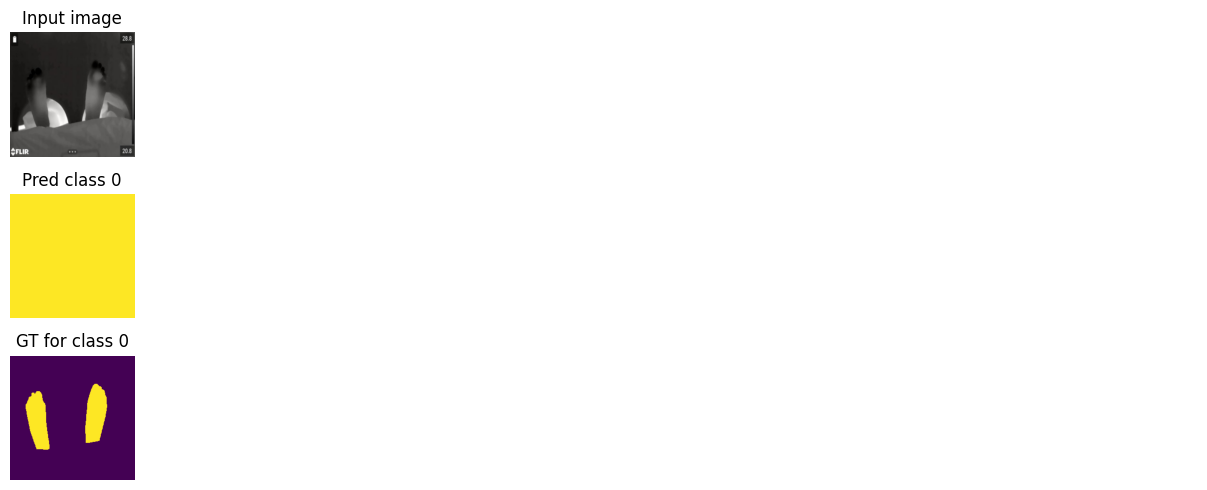

Train loss: 0.60348 | Time: 3m 10s | Val loss: 0.59084
Train_DICE_avg: 0.38174 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38174 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


Train loss: 0.60266 | Time: 3m 15s | Val loss: 0.59028
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.60235 | Time: 3m 20s | Val loss: 0.58992
Train_DICE_avg: 0.38167 | Train_Jaccard_avg: 0.24344 | Train_Sensitivity_avg: 0.24344 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38167 | Train_Jaccard: 0.24344 | Train_Sensitivity: 0.24344 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.60176 | Time: 3m 24s | Val loss: 0.58946
Train_DICE_avg: 0.38169 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38169 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.60137 | Time: 3m 29s | Val loss: 0.58898
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


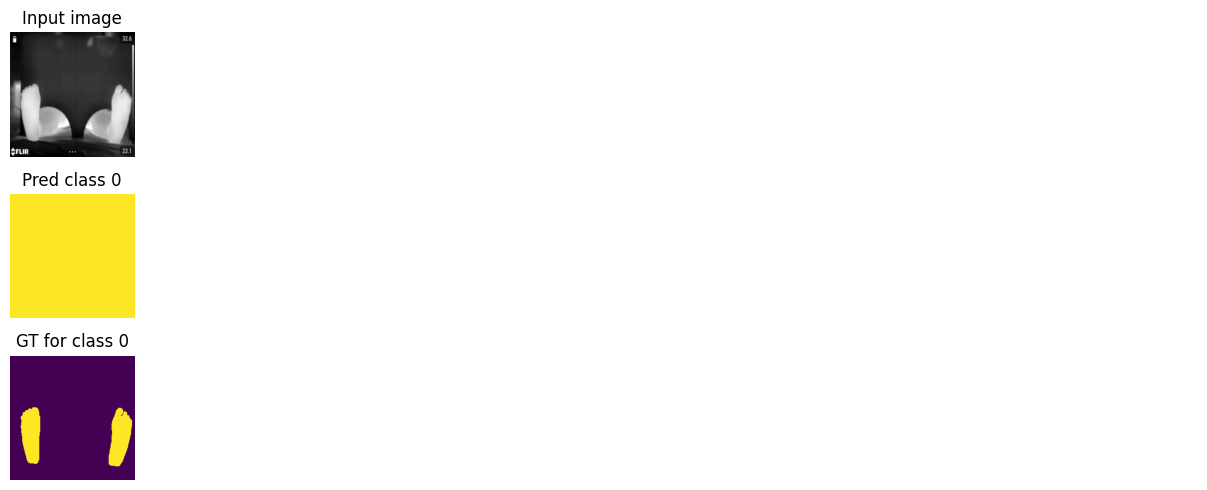

Train loss: 0.60074 | Time: 3m 34s | Val loss: 0.58845
Train_DICE_avg: 0.38165 | Train_Jaccard_avg: 0.24344 | Train_Sensitivity_avg: 0.24344 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38165 | Train_Jaccard: 0.24344 | Train_Sensitivity: 0.24344 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.60033 | Time: 3m 38s | Val loss: 0.58812
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.59997 | Time: 3m 43s | Val loss: 0.58780
Train_DICE_avg: 0.38173 | Train_Jaccard_avg: 0.24351 | Train_Sensitivity_avg: 0.24351 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38173 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24351 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.59953 | Time: 3m 48s | Val loss: 0.58754
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


Train loss: 0.59920 | Time: 3m 52s | Val loss: 0.58726
Train_DICE_avg: 0.38167 | Train_Jaccard_avg: 0.24346 | Train_Sensitivity_avg: 0.24346 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38167 | Train_Jaccard: 0.24346 | Train_Sensitivity: 0.24346 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


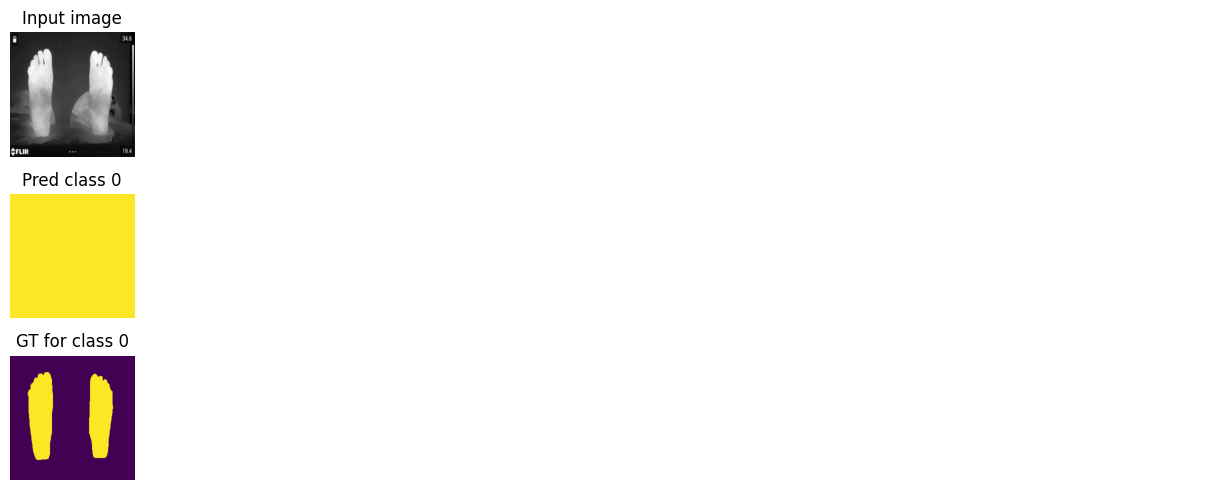

Train loss: 0.59873 | Time: 3m 57s | Val loss: 0.58696
Train_DICE_avg: 0.38185 | Train_Jaccard_avg: 0.24360 | Train_Sensitivity_avg: 0.24360 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38185 | Train_Jaccard: 0.24360 | Train_Sensitivity: 0.24360 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.59903 | Time: 4m 2s | Val loss: 0.58677
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.59842 | Time: 4m 6s | Val loss: 0.58655
Train_DICE_avg: 0.38165 | Train_Jaccard_avg: 0.24343 | Train_Sensitivity_avg: 0.24343 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38165 | Train_Jaccard: 0.24343 | Train_Sensitivity: 0.24343 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.59806 | Time: 4m 11s | Val loss: 0.58638
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


Train loss: 0.59794 | Time: 4m 15s | Val loss: 0.58620
Train_DICE_avg: 0.38181 | Train_Jaccard_avg: 0.24358 | Train_Sensitivity_avg: 0.24358 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38181 | Train_Jaccard: 0.24358 | Train_Sensitivity: 0.24358 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


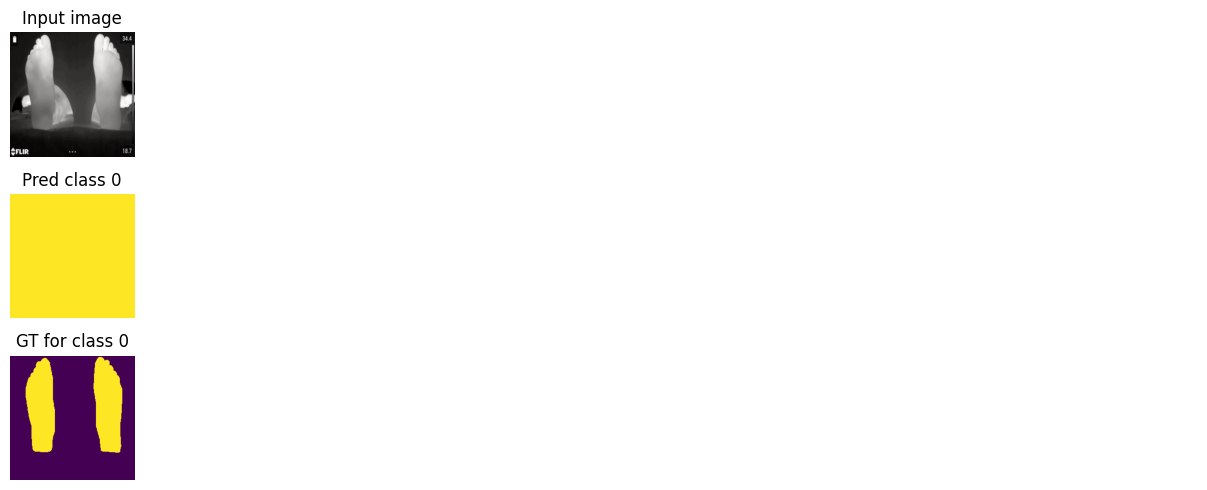

Train loss: 0.59775 | Time: 4m 20s | Val loss: 0.58611
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24351 | Train_Sensitivity_avg: 0.24351 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24351 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.59779 | Time: 4m 25s | Val loss: 0.58594
Train_DICE_avg: 0.38166 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38166 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


Train loss: 0.59733 | Time: 4m 30s | Val loss: 0.58581
Train_DICE_avg: 0.38180 | Train_Jaccard_avg: 0.24357 | Train_Sensitivity_avg: 0.24357 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38180 | Train_Jaccard: 0.24357 | Train_Sensitivity: 0.24357 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.59726 | Time: 4m 34s | Val loss: 0.58566
Train_DICE_avg: 0.38162 | Train_Jaccard_avg: 0.24340 | Train_Sensitivity_avg: 0.24340 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38162 | Train_Jaccard: 0.24340 | Train_Sensitivity: 0.24340 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Train loss: 0.59714 | Time: 4m 39s | Val loss: 0.58550
Train_DICE_avg: 0.38177 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38177 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


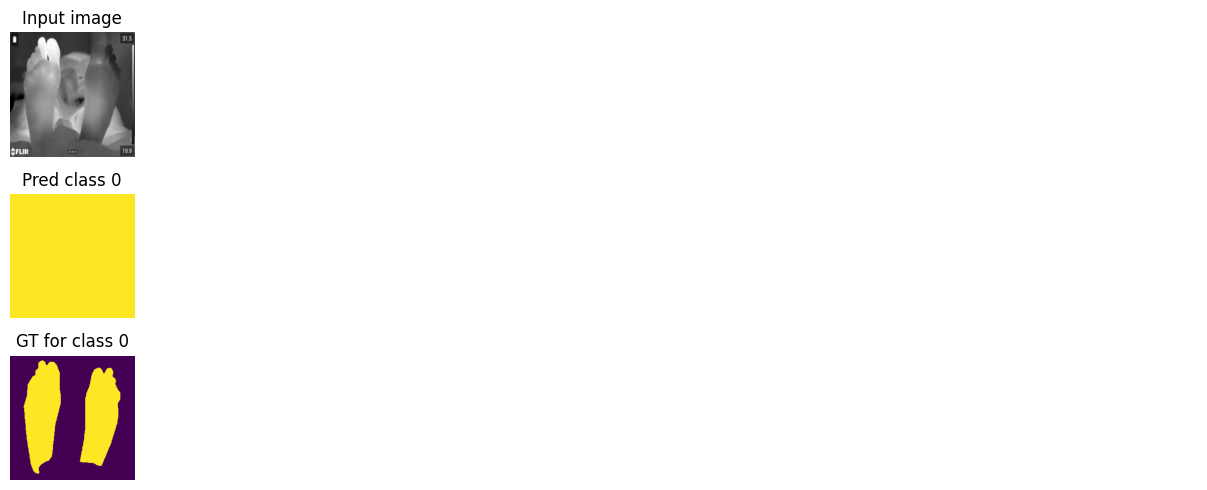

Train loss: 0.59697 | Time: 4m 44s | Val loss: 0.58545
Train_DICE_avg: 0.38162 | Train_Jaccard_avg: 0.24342 | Train_Sensitivity_avg: 0.24342 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38162 | Train_Jaccard: 0.24342 | Train_Sensitivity: 0.24342 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 


Training DICE,▅▆▇▅▅▁▄▆▆▆▅█▇▆▆▆▅▇█▆▄▆▆▃▅▆▄▄▆▃▅▄█▆▃▅▃▆▂▂
Training Jaccard,▄▆▇▅▄▄▆▄▄▅▃▅█▅▆▇▅█▆▄▅▄▅▂▂▅▅▅▄▅▄▅▄▃▅▄▇▄▁▂
Training Loss,█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Training Sensitivity,▄▆▇▅▄▄▆▄▃▄▅▅▃▃▄▇▅▄▆▇▅█▅▃▃▅▁▁▅▂▅▂▄▄▂▅▃▇▄▁
Training Specificity,▁███████████████████████████████████████
Validation DICE,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Jaccard,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Loss,█████▇▇▇▇▆▆▆▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Specificity,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training DICE,0.38162



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 204MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Global Performance Metrics:
Loss mean: 0.64821, std: 0.00000
Dice Coefficient mean: 0.37976, std: 0.14268
Jaccard Index mean: 0.24430, std: 0.11303
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.00002, std: 0.00000

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.37976, std: 0.14268
Jaccard mean: 0.24430, std: 0.11303
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.00002, std: 0.00000


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-FCN-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.47 GB
GPU Memory - Reserved: 8.71 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


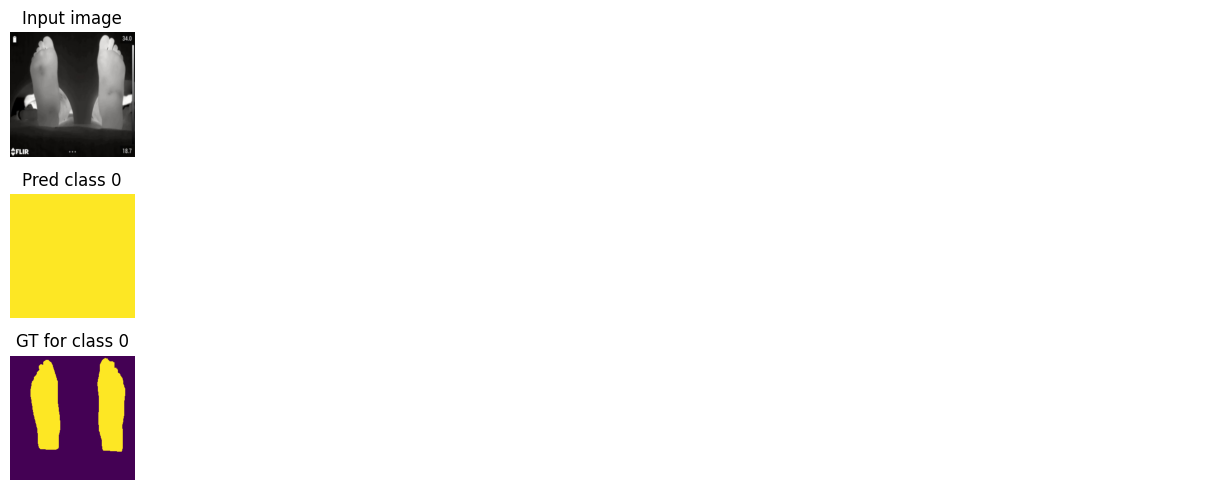

Train loss: 0.67164 | Time: 0m 5s | Val loss: 0.74088
Train_DICE_avg: 0.00002 | Train_Jaccard_avg: 0.00001 | Train_Sensitivity_avg: 0.79263 | Train_Specificity_avg: 0.75654 
Class 0 - Train_DICE: 0.00002 | Train_Jaccard: 0.00001 | Train_Sensitivity: 0.79263 | Train_Specificity: 0.75654 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.65735 | Time: 0m 9s | Val loss: 0.73847
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 0.94395 | Train_Specificity_avg: 0.75661 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 0.94395 | Train_Specificity: 0.75661 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


Train loss: 0.64419 | Time: 0m 13s | Val loss: 0.73492
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 0.99206 | Train_Specificity_avg: 0.75641 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 0.99206 | Train_Specificity: 0.75641 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.63281 | Time: 0m 18s | Val loss: 0.72941
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


Train loss: 0.62043 | Time: 0m 22s | Val loss: 0.72087
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75634 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75634 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


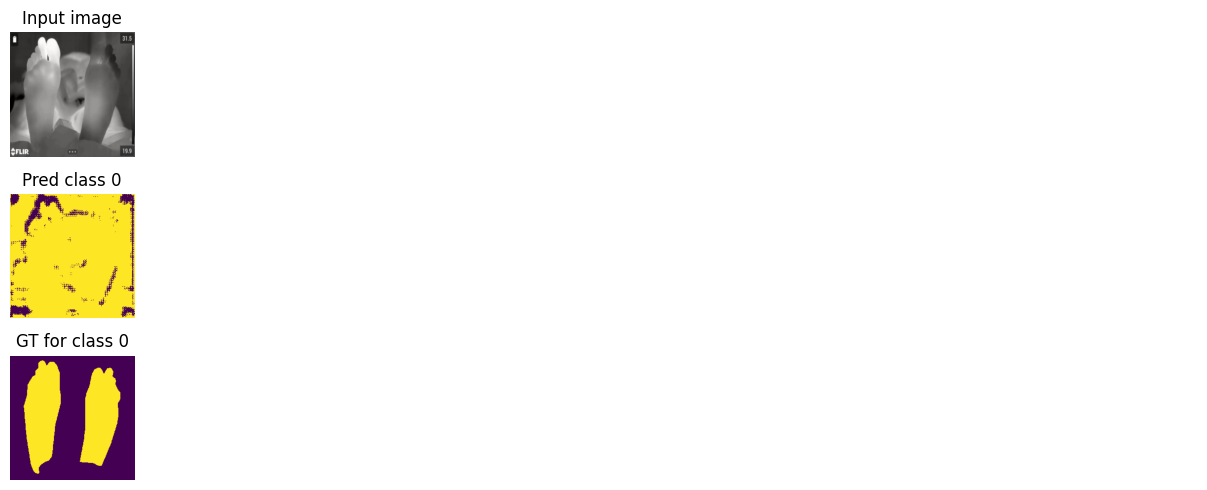

Train loss: 0.61094 | Time: 0m 27s | Val loss: 0.70796
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75646 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75646 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


Train loss: 0.60098 | Time: 0m 32s | Val loss: 0.68955
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75641 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75641 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.59161 | Time: 0m 36s | Val loss: 0.66580
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75656 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75656 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.58423 | Time: 0m 41s | Val loss: 0.63893
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75667 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75667 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.57716 | Time: 0m 45s | Val loss: 0.61381
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


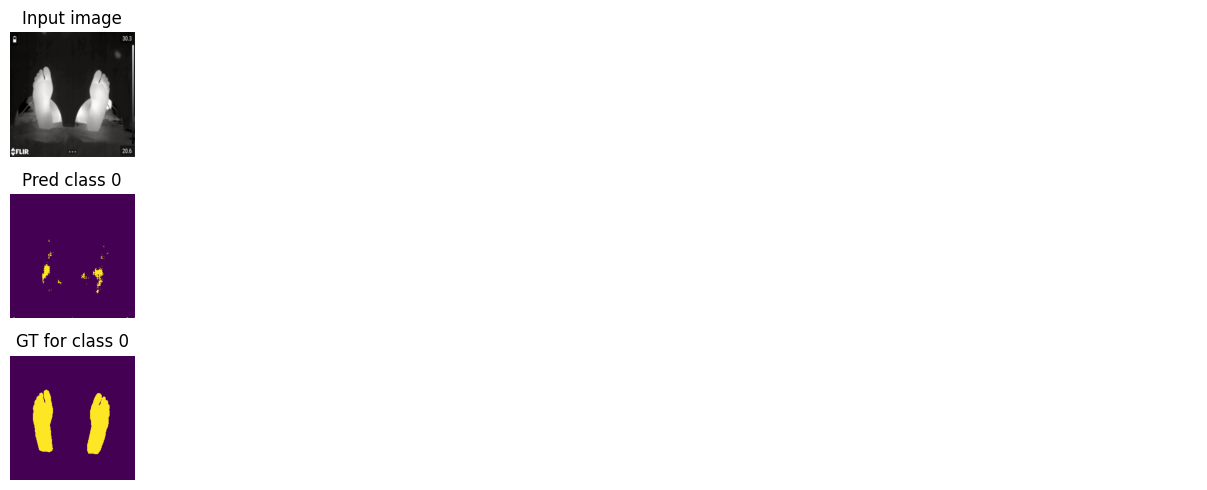

Train loss: 0.57125 | Time: 0m 50s | Val loss: 0.59273
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75663 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75663 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.56359 | Time: 0m 55s | Val loss: 0.57851
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.55789 | Time: 1m 0s | Val loss: 0.57002
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75653 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75653 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.55246 | Time: 1m 4s | Val loss: 0.56328
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75643 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75643 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.54755 | Time: 1m 9s | Val loss: 0.55891
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75643 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75643 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


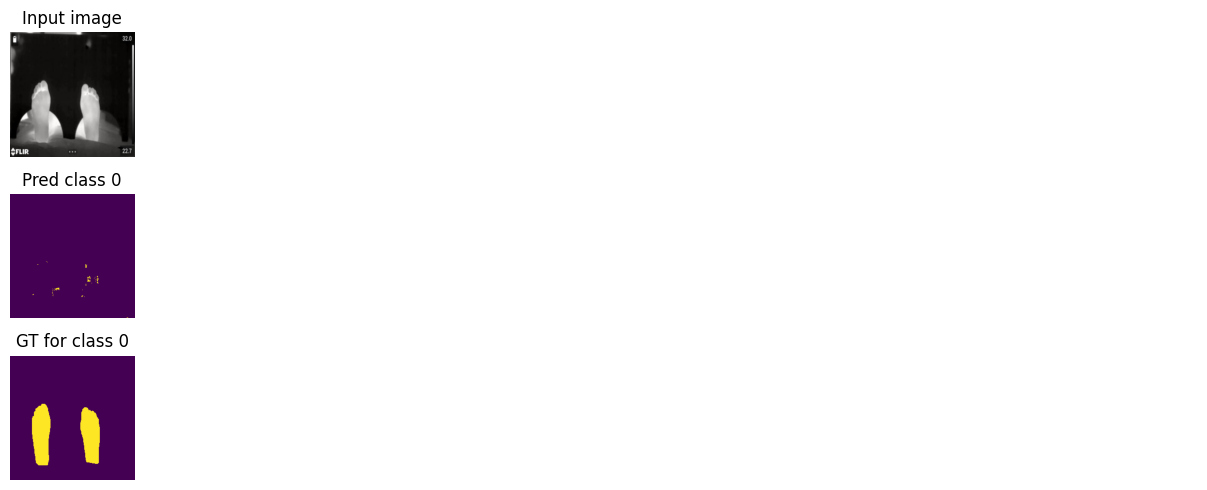

Train loss: 0.54325 | Time: 1m 14s | Val loss: 0.55461
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.53991 | Time: 1m 19s | Val loss: 0.55156
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.53716 | Time: 1m 23s | Val loss: 0.54846
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.53332 | Time: 1m 28s | Val loss: 0.54594
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74494 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74494 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.53221 | Time: 1m 32s | Val loss: 0.54356
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


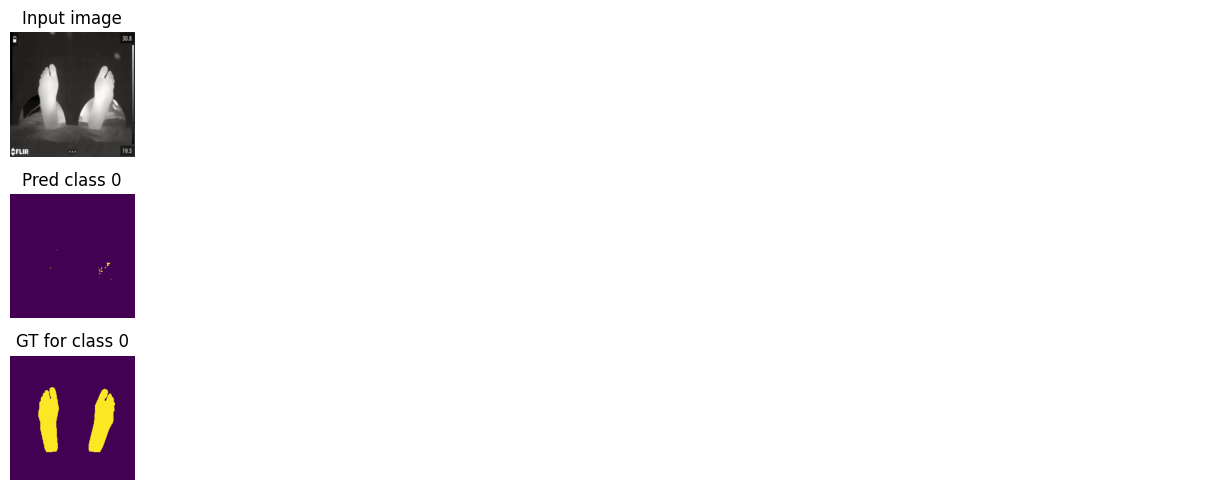

Train loss: 0.53047 | Time: 1m 37s | Val loss: 0.54085
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75646 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75646 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74494 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74494 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.52551 | Time: 1m 42s | Val loss: 0.53846
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.52481 | Time: 1m 46s | Val loss: 0.53636
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.52099 | Time: 1m 51s | Val loss: 0.53439
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.52119 | Time: 1m 56s | Val loss: 0.53228
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74494 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74494 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


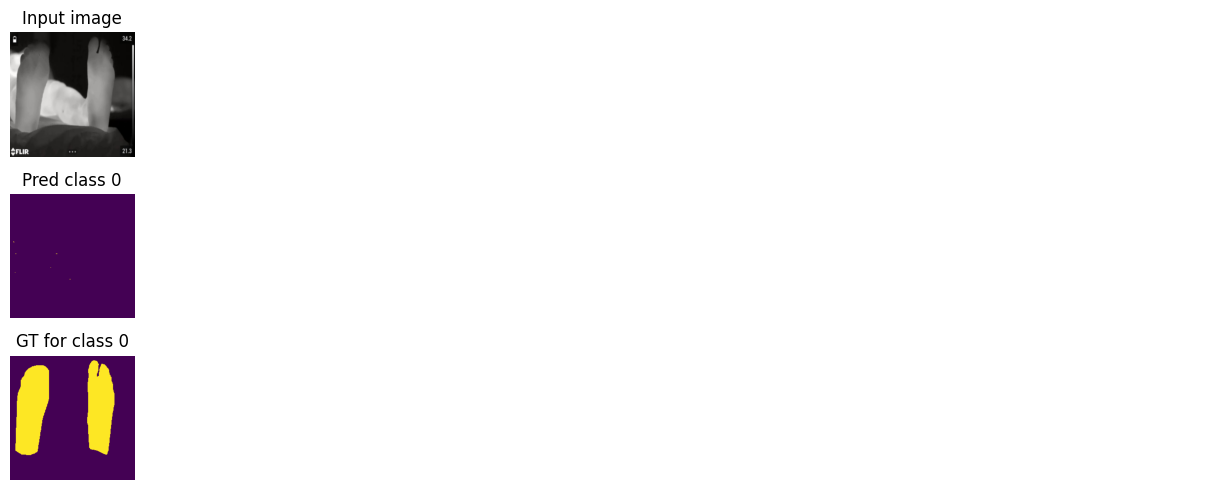

Train loss: 0.51875 | Time: 2m 1s | Val loss: 0.53015
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75659 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75659 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.51666 | Time: 2m 5s | Val loss: 0.52781
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.51450 | Time: 2m 10s | Val loss: 0.52529
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


Train loss: 0.51154 | Time: 2m 14s | Val loss: 0.52238
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75653 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75653 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.50997 | Time: 2m 19s | Val loss: 0.52042
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75641 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75641 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


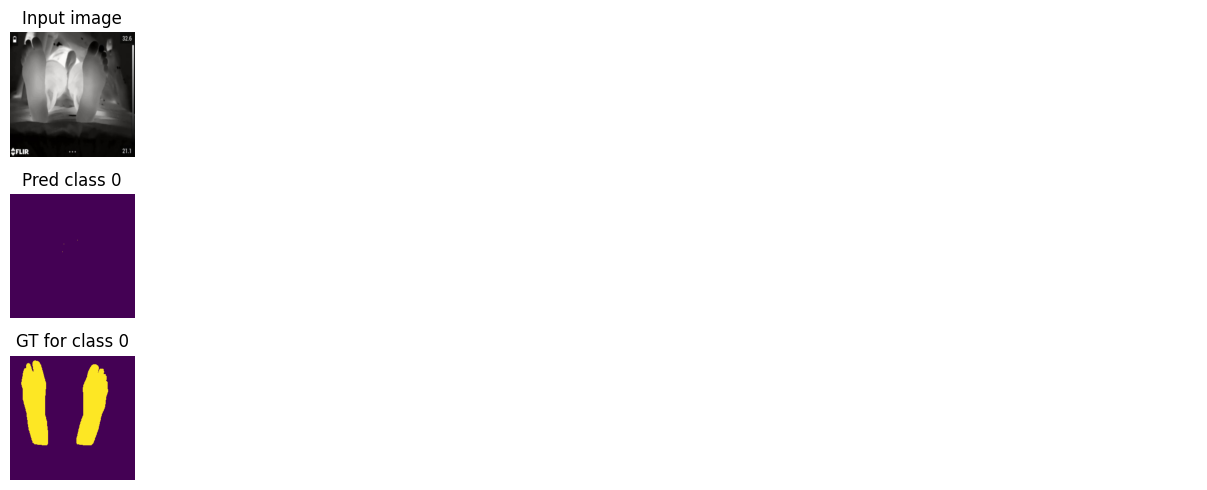

Train loss: 0.50849 | Time: 2m 24s | Val loss: 0.51769
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.50623 | Time: 2m 28s | Val loss: 0.51496
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75638 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75638 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.50344 | Time: 2m 33s | Val loss: 0.51192
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75650 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75650 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


Train loss: 0.49983 | Time: 2m 37s | Val loss: 0.50865
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.49691 | Time: 2m 42s | Val loss: 0.50569
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75650 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75650 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


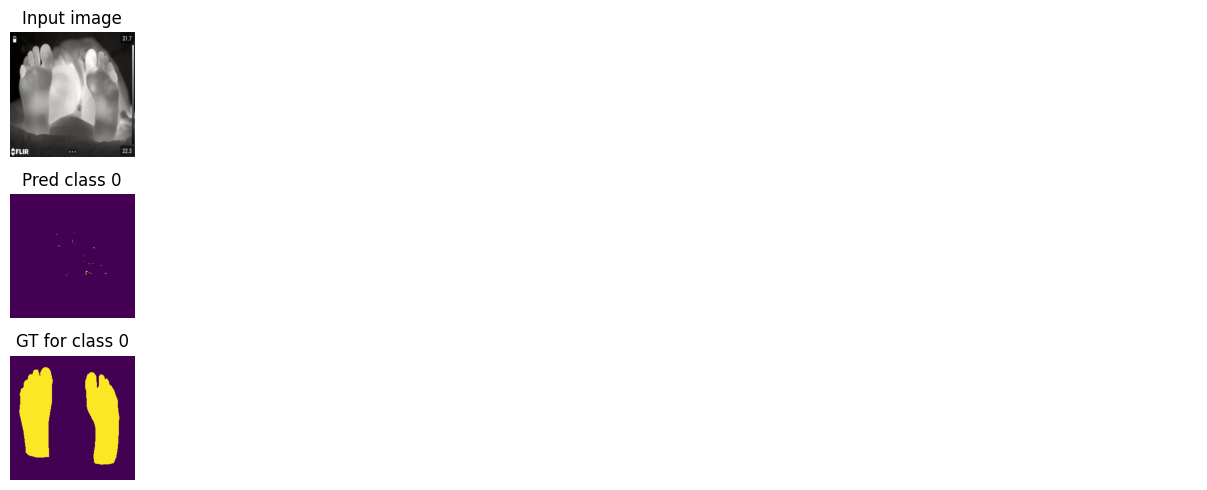

Train loss: 0.49603 | Time: 2m 47s | Val loss: 0.50243
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74495 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74495 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.49307 | Time: 2m 51s | Val loss: 0.49900
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75641 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75641 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.49041 | Time: 2m 56s | Val loss: 0.49572
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75650 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75650 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


Train loss: 0.48547 | Time: 3m 1s | Val loss: 0.49240
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75656 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75656 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.48459 | Time: 3m 5s | Val loss: 0.48925
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75640 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75640 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


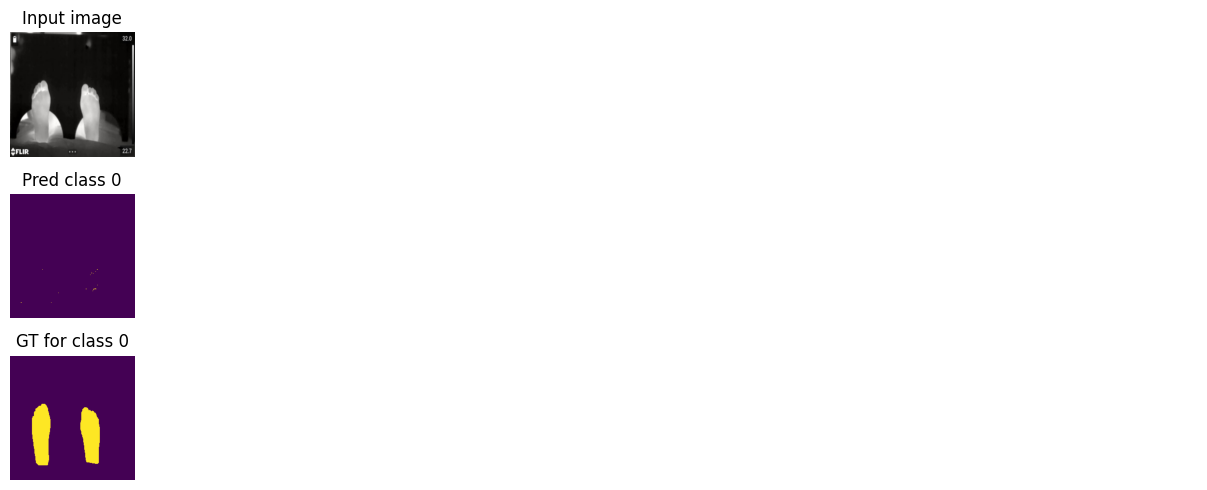

Train loss: 0.48301 | Time: 3m 10s | Val loss: 0.48613
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75654 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75654 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


Train loss: 0.47970 | Time: 3m 15s | Val loss: 0.48307
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.47668 | Time: 3m 19s | Val loss: 0.48084
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.47595 | Time: 3m 24s | Val loss: 0.47833
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.47361 | Time: 3m 28s | Val loss: 0.47632
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


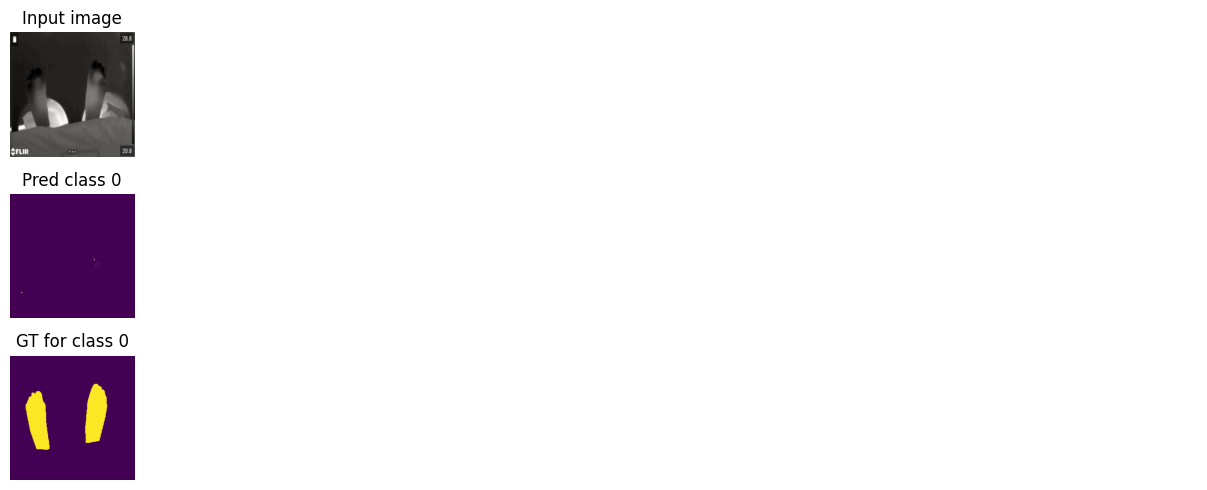

Train loss: 0.47164 | Time: 3m 33s | Val loss: 0.47463
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75653 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75653 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


Train loss: 0.46996 | Time: 3m 38s | Val loss: 0.47279
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75653 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75653 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.46794 | Time: 3m 42s | Val loss: 0.47125
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.46718 | Time: 3m 47s | Val loss: 0.46978
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.46593 | Time: 3m 51s | Val loss: 0.46788
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75643 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75643 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


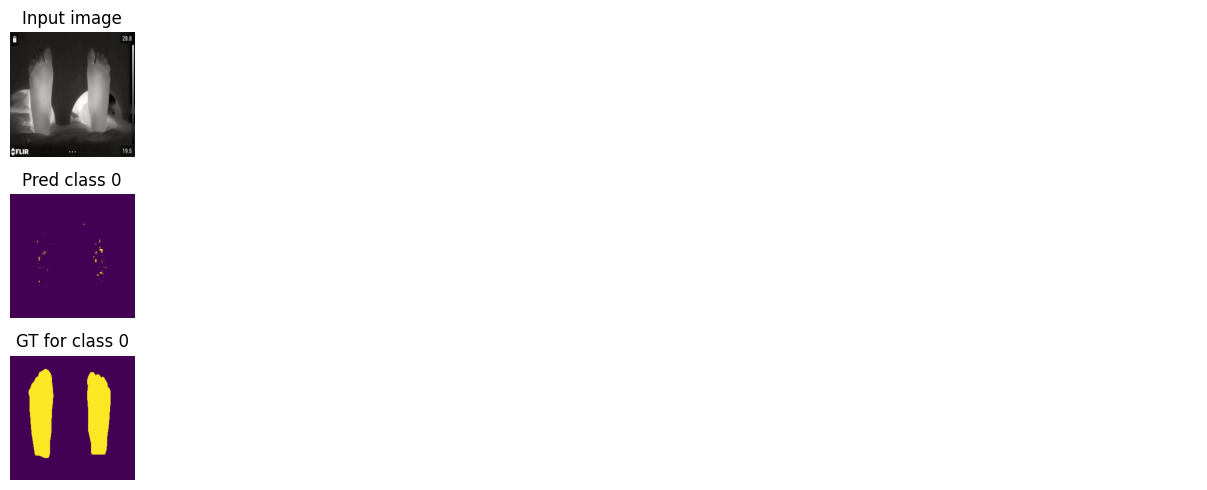

Train loss: 0.46363 | Time: 3m 56s | Val loss: 0.46664
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75655 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75655 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


Train loss: 0.46272 | Time: 4m 1s | Val loss: 0.46549
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.45980 | Time: 4m 6s | Val loss: 0.46423
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75655 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75655 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.46019 | Time: 4m 10s | Val loss: 0.46314
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75643 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75643 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


Train loss: 0.45779 | Time: 4m 15s | Val loss: 0.46234
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


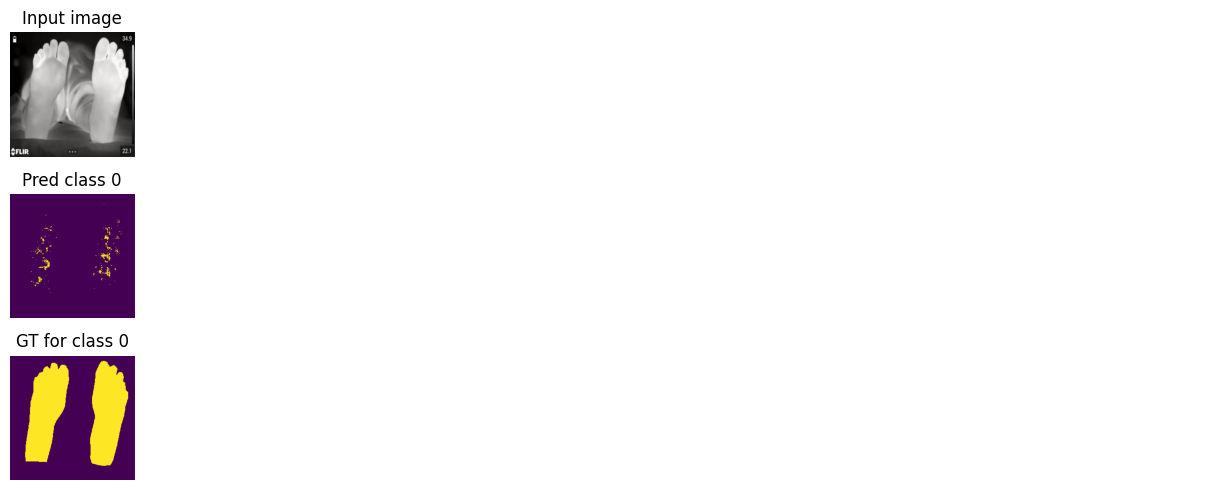

Train loss: 0.45846 | Time: 4m 20s | Val loss: 0.46162
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75655 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75655 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


Train loss: 0.45582 | Time: 4m 24s | Val loss: 0.46041
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75650 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75650 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.45706 | Time: 4m 29s | Val loss: 0.45979
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75640 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75640 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.45527 | Time: 4m 34s | Val loss: 0.45888
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


Train loss: 0.45422 | Time: 4m 38s | Val loss: 0.45836
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


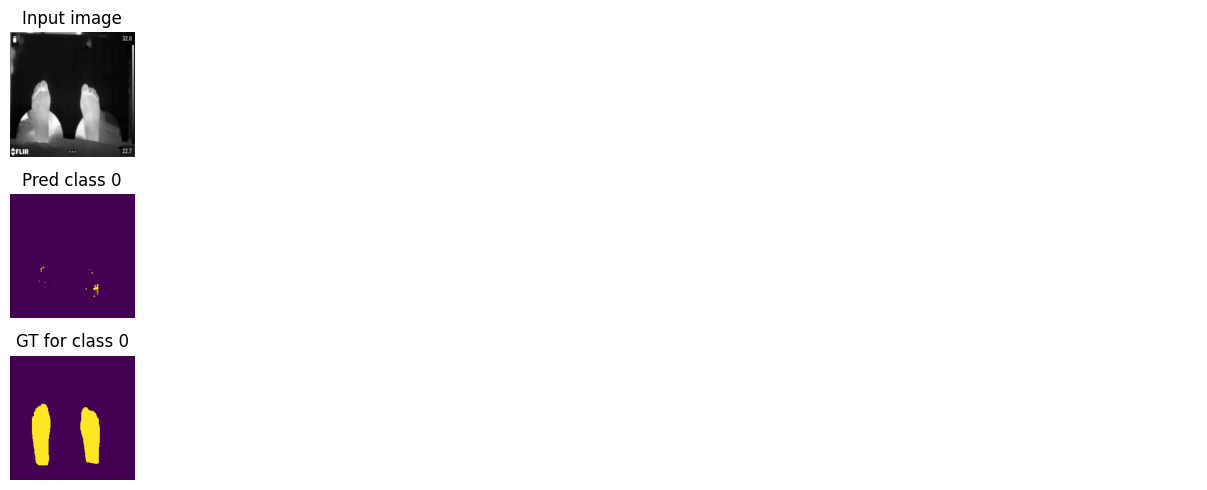

Train loss: 0.45367 | Time: 4m 43s | Val loss: 0.45736
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75643 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75643 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 


Training DICE,▅▁▄▄█▇▄▇▄▄▅▆▆▃▃▃▇▄▇▂▇▃▂▅▇▅▅▄▄▄▆▄▃▂▃▃▂▇▅▂
Training Jaccard,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Loss,██▇▆▆▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
Training Sensitivity,▁███████████████████████████████████████
Training Specificity,▅▁▄▆█▆▃▃▅▄▄▄▄▅▄▇▄▆▃▅▅▅▂▃▅▆▂▅▄▄▆▄▅▃▆▆▃▂▅▃
Validation DICE,▁▁▁▁▁▁▁▂▂▃▆▄▄▆▇▅█▆▆▅▇▇▄▅▅▇▇▆▇▇▄▅▄▄▄▄▃▄▄▃
Validation Jaccard,▁▁▁▁▁▂▂▃▅▅▄▆▇▅▇▅█▆▆▆▇▅▄▅▅▇▇▆▇▇▆▄▄▄▄▄▄▄▄▃
Validation Loss,████▇▆▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Specificity,████▇▇▆▅▅▅▁▄▂▄▂▅▅▇█▅▇█▇▅▆▆▇▇▇██▇▇▇▇█▇▇▇▇
Training DICE,0.0



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


Global Performance Metrics:
Loss mean: 0.52129, std: 0.00000
Dice Coefficient mean: 0.00334, std: 0.00450
Jaccard Index mean: 0.00172, std: 0.00227
Sensitivity mean: 0.00172, std: 0.00228
Specificity mean: 0.99979, std: 0.00047

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.00334, std: 0.00450
Jaccard mean: 0.00172, std: 0.00227
Sensitivity mean: 0.00172, std: 0.00228
Specificity mean: 0.99979, std: 0.00047


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-FCN-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 8.72 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


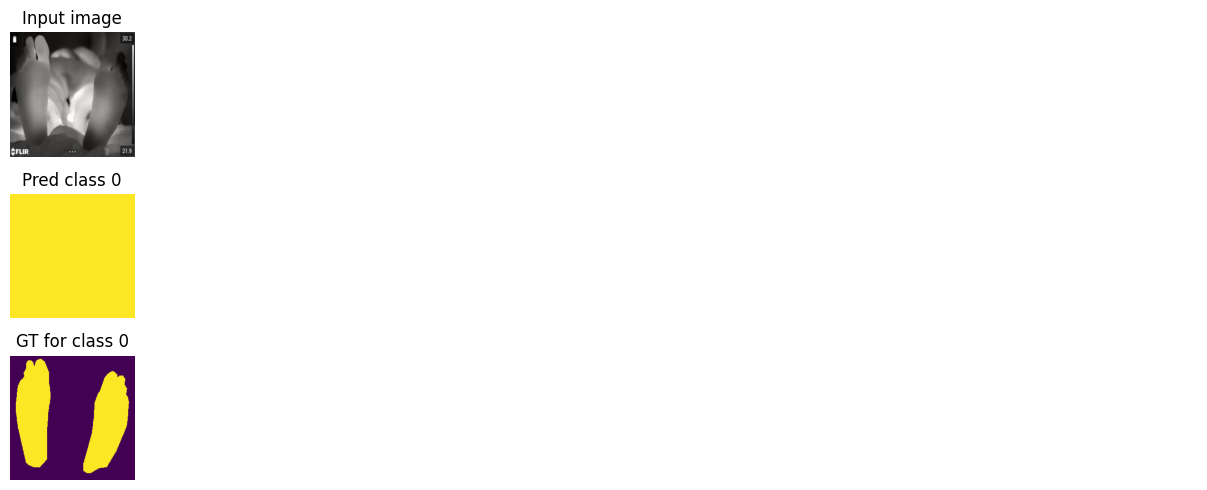

Train loss: 0.07510 | Time: 0m 4s | Val loss: 0.07555
Train_DICE_avg: 0.01628 | Train_Jaccard_avg: 0.00827 | Train_Sensitivity_avg: 0.11391 | Train_Specificity_avg: 0.75479 
Class 0 - Train_DICE: 0.01628 | Train_Jaccard: 0.00827 | Train_Sensitivity: 0.11391 | Train_Specificity: 0.75479 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.07324 | Time: 0m 9s | Val loss: 0.07538
Train_DICE_avg: 0.00153 | Train_Jaccard_avg: 0.00077 | Train_Sensitivity_avg: 0.06297 | Train_Specificity_avg: 0.75606 
Class 0 - Train_DICE: 0.00153 | Train_Jaccard: 0.00077 | Train_Sensitivity: 0.06297 | Train_Specificity: 0.75606 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.07151 | Time: 0m 13s | Val loss: 0.07518
Train_DICE_avg: 0.00005 | Train_Jaccard_avg: 0.00002 | Train_Sensitivity_avg: 0.08018 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00005 | Train_Jaccard: 0.00002 | Train_Sensitivity: 0.08018 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.06994 | Time: 0m 18s | Val loss: 0.07487
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 0.62698 | Train_Specificity_avg: 0.75641 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 0.62698 | Train_Specificity: 0.75641 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


Train loss: 0.06863 | Time: 0m 22s | Val loss: 0.07444
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 0.99603 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 0.99603 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


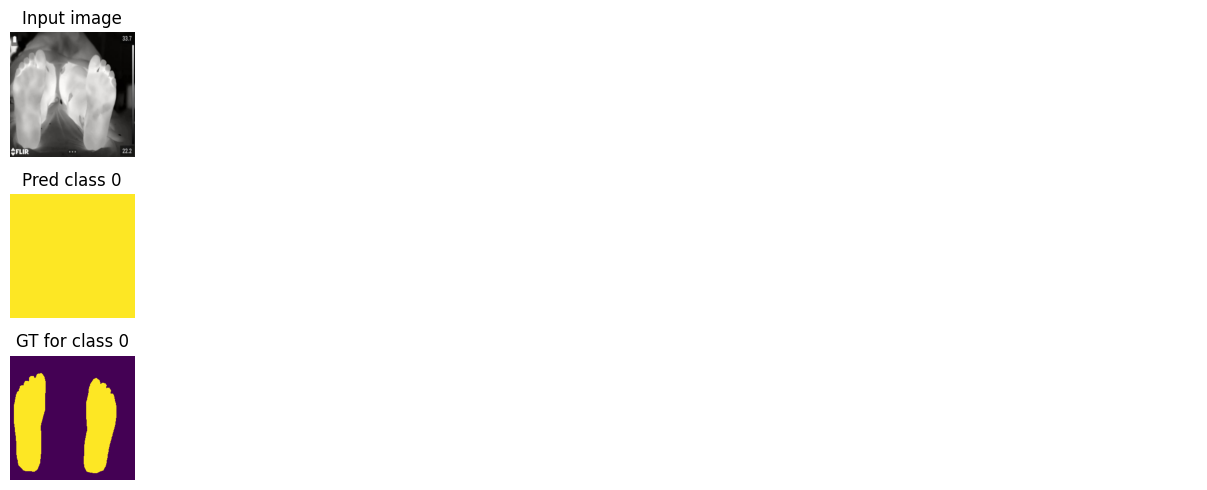

Train loss: 0.06735 | Time: 0m 27s | Val loss: 0.07378
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75657 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75657 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.06625 | Time: 0m 31s | Val loss: 0.07280
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


Train loss: 0.06535 | Time: 0m 36s | Val loss: 0.07143
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.06457 | Time: 0m 40s | Val loss: 0.06972
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75660 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75660 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.06369 | Time: 0m 45s | Val loss: 0.06776
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75642 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75642 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


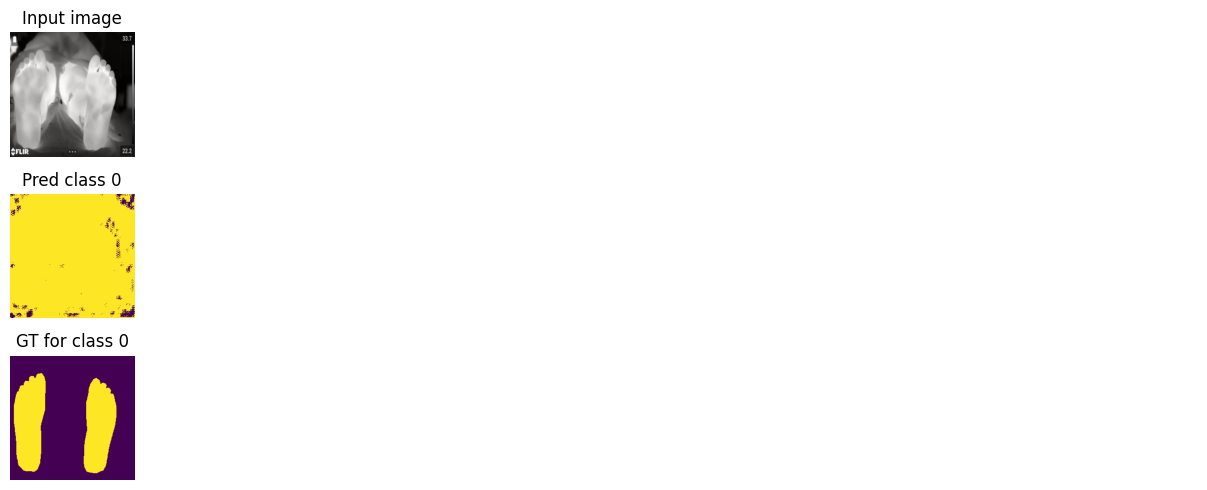

Train loss: 0.06332 | Time: 0m 50s | Val loss: 0.06586
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.06288 | Time: 0m 54s | Val loss: 0.06445
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75638 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75638 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


Train loss: 0.06225 | Time: 0m 59s | Val loss: 0.06337
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.06198 | Time: 1m 3s | Val loss: 0.06269
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75643 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75643 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.06152 | Time: 1m 8s | Val loss: 0.06217
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


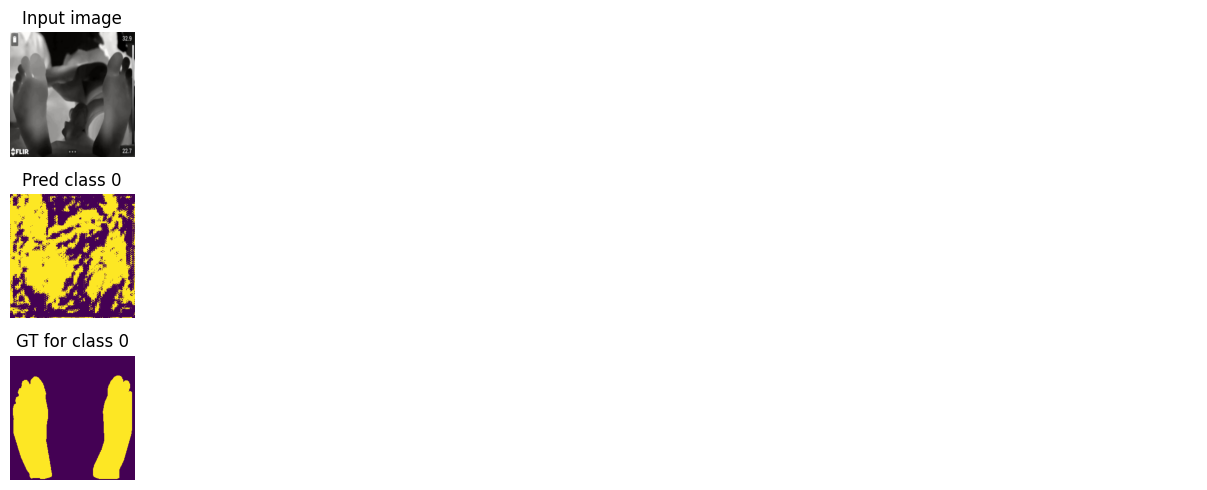

Train loss: 0.06116 | Time: 1m 13s | Val loss: 0.06176
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75652 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75652 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.06104 | Time: 1m 17s | Val loss: 0.06149
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.06061 | Time: 1m 22s | Val loss: 0.06116
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75646 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75646 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.06077 | Time: 1m 26s | Val loss: 0.06096
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.06051 | Time: 1m 31s | Val loss: 0.06081
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


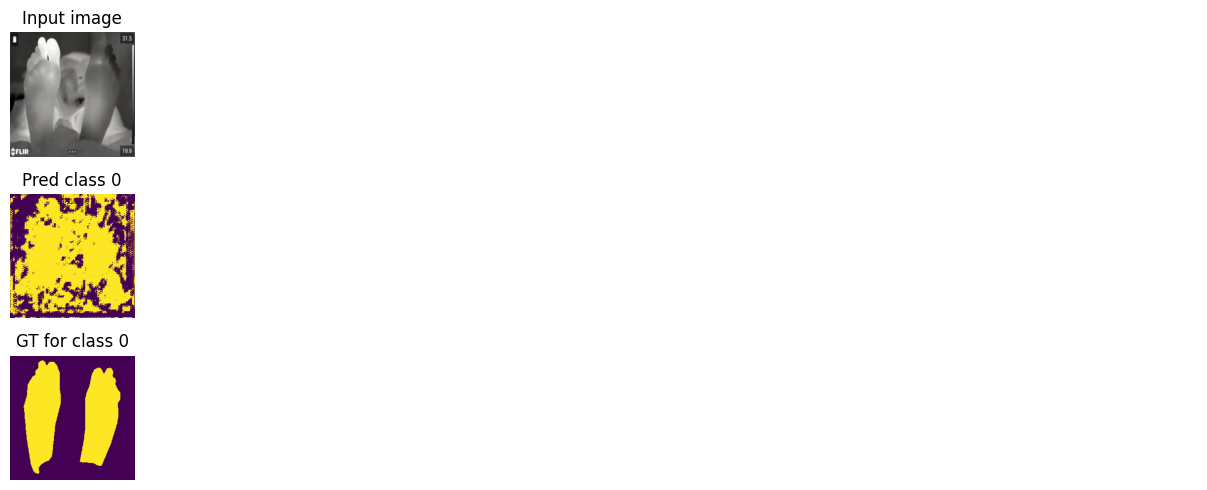

Train loss: 0.06061 | Time: 1m 36s | Val loss: 0.06060
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75655 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75655 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.06015 | Time: 1m 40s | Val loss: 0.06039
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75655 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75655 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.05992 | Time: 1m 45s | Val loss: 0.06014
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75660 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75660 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.05963 | Time: 1m 50s | Val loss: 0.05991
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.05949 | Time: 1m 54s | Val loss: 0.05961
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


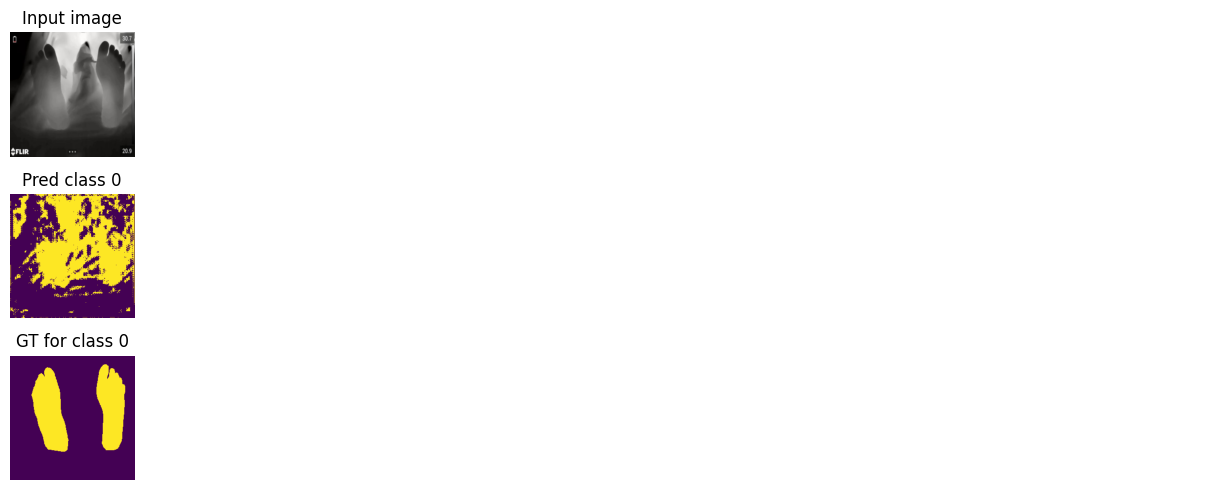

Train loss: 0.05949 | Time: 1m 59s | Val loss: 0.05943
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.05915 | Time: 2m 4s | Val loss: 0.05911
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.05902 | Time: 2m 8s | Val loss: 0.05875
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75642 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75642 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.05862 | Time: 2m 13s | Val loss: 0.05838
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75646 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75646 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.05838 | Time: 2m 17s | Val loss: 0.05792
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


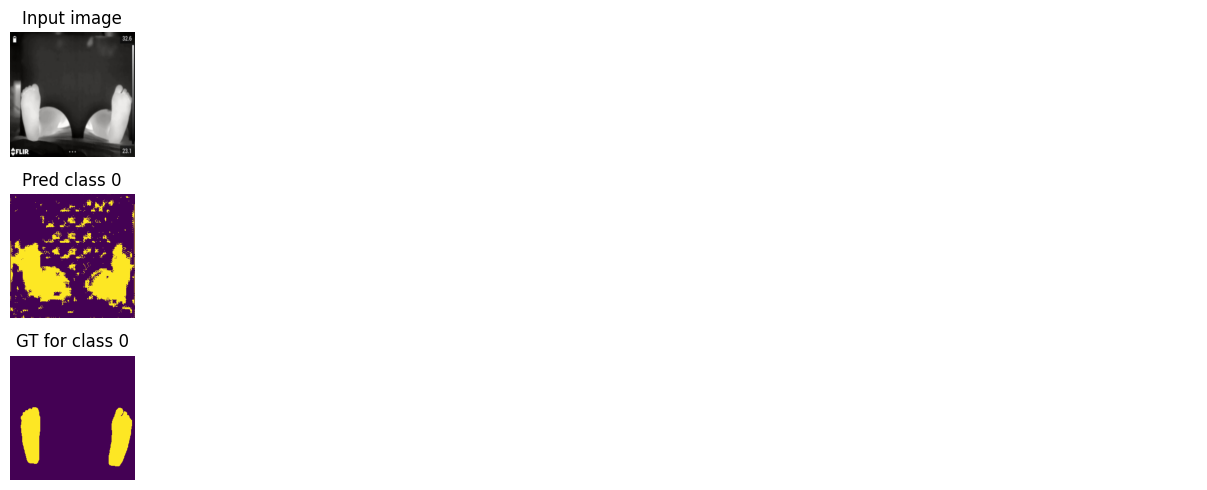

Train loss: 0.05836 | Time: 2m 22s | Val loss: 0.05747
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.05798 | Time: 2m 27s | Val loss: 0.05704
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.05772 | Time: 2m 32s | Val loss: 0.05660
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75654 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75654 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


Train loss: 0.05723 | Time: 2m 36s | Val loss: 0.05624
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75642 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75642 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.05711 | Time: 2m 41s | Val loss: 0.05595
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


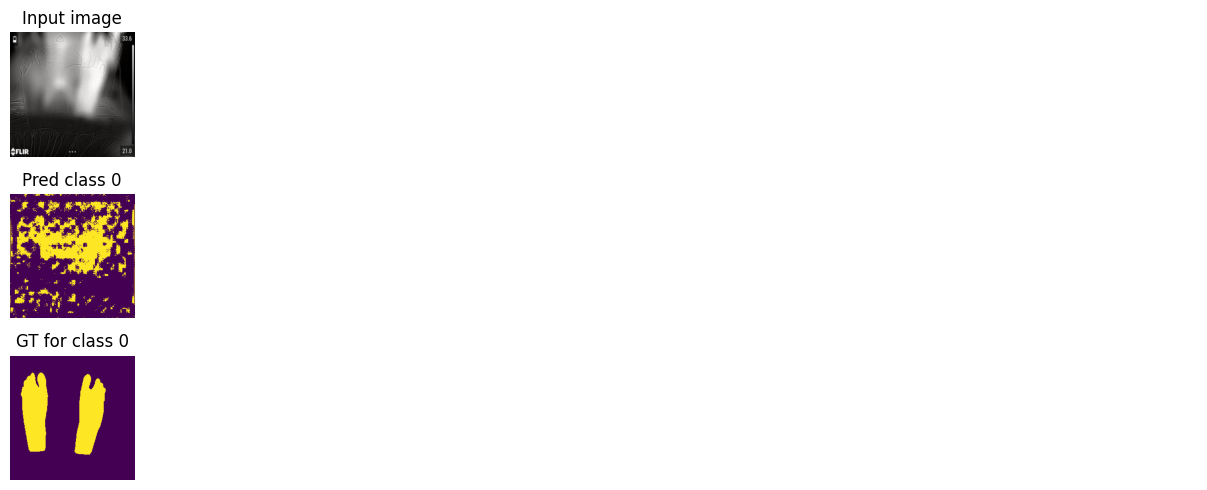

Train loss: 0.05675 | Time: 2m 46s | Val loss: 0.05561
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.05619 | Time: 2m 50s | Val loss: 0.05535
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75646 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75646 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.05654 | Time: 2m 55s | Val loss: 0.05517
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75653 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75653 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


Train loss: 0.05621 | Time: 3m 0s | Val loss: 0.05494
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.05606 | Time: 3m 4s | Val loss: 0.05471
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75645 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75645 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


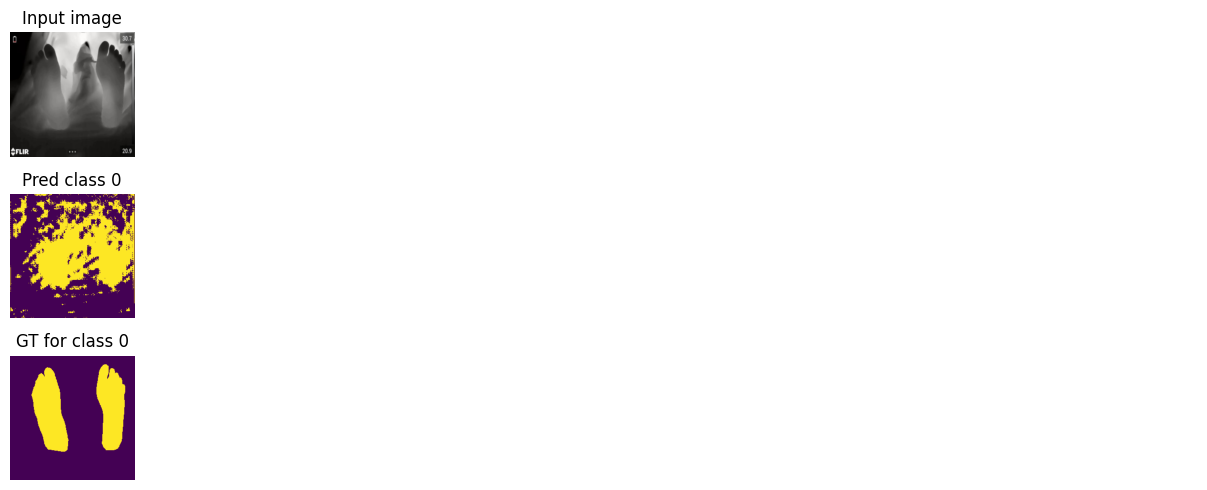

Train loss: 0.05577 | Time: 3m 9s | Val loss: 0.05453
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75631 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75631 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.05582 | Time: 3m 14s | Val loss: 0.05441
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75655 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75655 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.05550 | Time: 3m 18s | Val loss: 0.05425
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75640 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75640 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.05515 | Time: 3m 23s | Val loss: 0.05402
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.05516 | Time: 3m 27s | Val loss: 0.05394
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75642 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75642 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


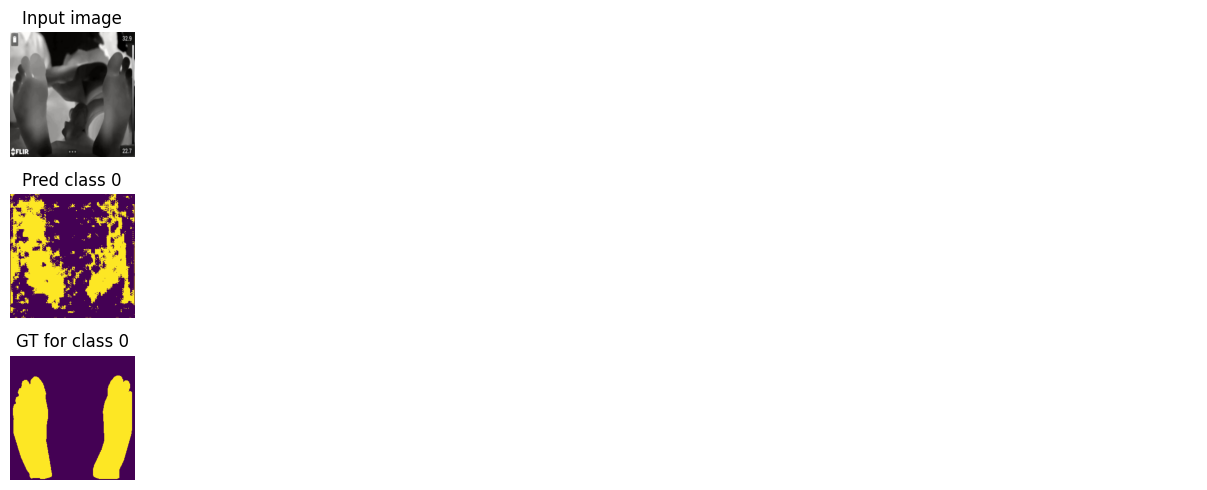

Train loss: 0.05483 | Time: 3m 32s | Val loss: 0.05375
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75648 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75648 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.05472 | Time: 3m 37s | Val loss: 0.05362
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75642 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75642 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.05447 | Time: 3m 41s | Val loss: 0.05351
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.05478 | Time: 3m 46s | Val loss: 0.05349
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75639 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.05447 | Time: 3m 51s | Val loss: 0.05340
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


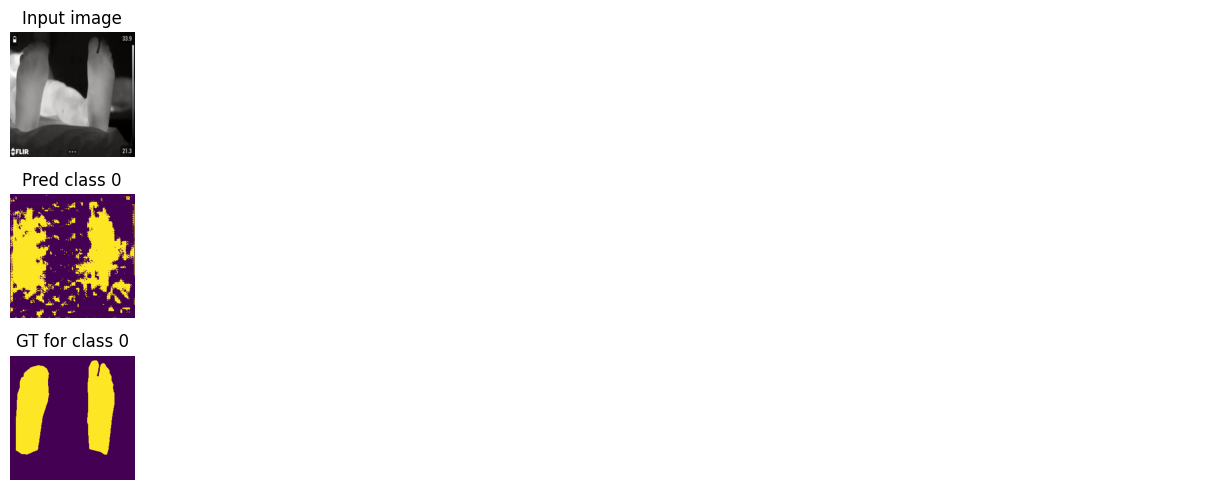

Train loss: 0.05426 | Time: 3m 56s | Val loss: 0.05330
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75653 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75653 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.05441 | Time: 4m 0s | Val loss: 0.05320
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.05420 | Time: 4m 5s | Val loss: 0.05311
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75640 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75640 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.05384 | Time: 4m 9s | Val loss: 0.05293
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75658 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75658 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.05395 | Time: 4m 14s | Val loss: 0.05292
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75649 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75649 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


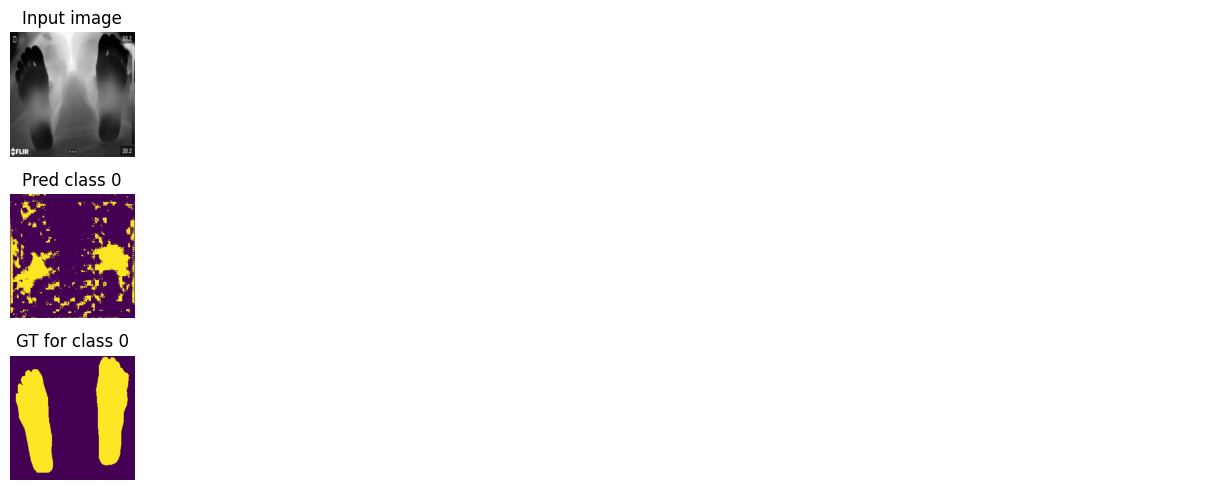

Train loss: 0.05370 | Time: 4m 19s | Val loss: 0.05276
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75656 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75656 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


Train loss: 0.05341 | Time: 4m 24s | Val loss: 0.05272
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.05426 | Time: 4m 29s | Val loss: 0.05275
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75647 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75647 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.05373 | Time: 4m 33s | Val loss: 0.05263
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75651 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75651 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.05336 | Time: 4m 38s | Val loss: 0.05256
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75644 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75644 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


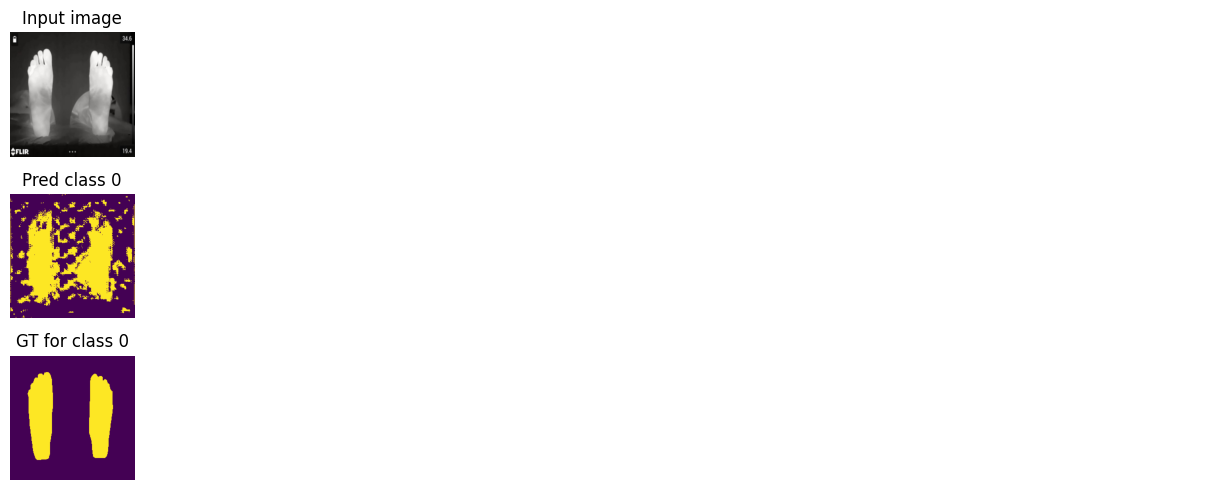

Train loss: 0.05350 | Time: 4m 43s | Val loss: 0.05253
Train_DICE_avg: 0.00000 | Train_Jaccard_avg: 0.00000 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.75654 
Class 0 - Train_DICE: 0.00000 | Train_Jaccard: 0.00000 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.75654 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 


Training DICE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Jaccard,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Loss,█▇▇▆▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▁▅█████████████████████████████████████
Training Specificity,▁▇▆█▆▆▆▆▆▇▆▇▇█▆▆▇▆▆▆▇▇▅▆▇▆▄▇▅▇▆▆▅▇▆█▇▆▆▇
Validation DICE,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▂▁▁▁▁▁▂▁▃▁▁▁▁▁▁█
Validation Jaccard,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▃▁▁▁▁▁▂▃▁▁▁▁▂▁▁█
Validation Loss,█████▇▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Specificity,██████████▇████▇▇█▆▆▇▆▆▇▄▅▅▃▃▄▄▃▁▂▂▂▁▂▂▁
Training DICE,0.0



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Global Performance Metrics:
Loss mean: 0.05282, std: 0.00000
Dice Coefficient mean: 0.55584, std: 0.13984
Jaccard Index mean: 0.39772, std: 0.13343
Sensitivity mean: 0.78896, std: 0.13741
Specificity mean: 0.69533, std: 0.10943

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.55584, std: 0.13984
Jaccard mean: 0.39772, std: 0.13343
Sensitivity mean: 0.78896, std: 0.13741
Specificity mean: 0.69533, std: 0.10943


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-FCN-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 13.15 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


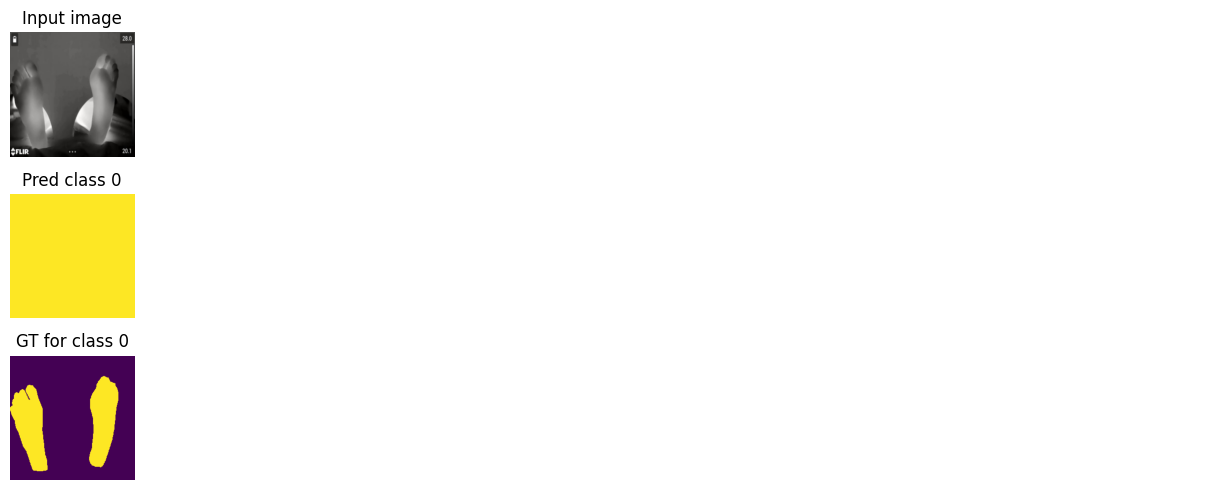

Train loss: 0.70630 | Time: 0m 4s | Val loss: 0.69585
Train_DICE_avg: 0.38180 | Train_Jaccard_avg: 0.24357 | Train_Sensitivity_avg: 0.24357 | Train_Specificity_avg: 0.99603 
Class 0 - Train_DICE: 0.38180 | Train_Jaccard: 0.24357 | Train_Sensitivity: 0.24357 | Train_Specificity: 0.99603 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.70567 | Time: 0m 9s | Val loss: 0.69572
Train_DICE_avg: 0.38171 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 0.99901 
Class 0 - Train_DICE: 0.38171 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 0.99901 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.70488 | Time: 0m 13s | Val loss: 0.69555
Train_DICE_avg: 0.38181 | Train_Jaccard_avg: 0.24358 | Train_Sensitivity_avg: 0.24358 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38181 | Train_Jaccard: 0.24358 | Train_Sensitivity: 0.24358 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.70419 | Time: 0m 18s | Val loss: 0.69533
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


Train loss: 0.70348 | Time: 0m 22s | Val loss: 0.69499
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


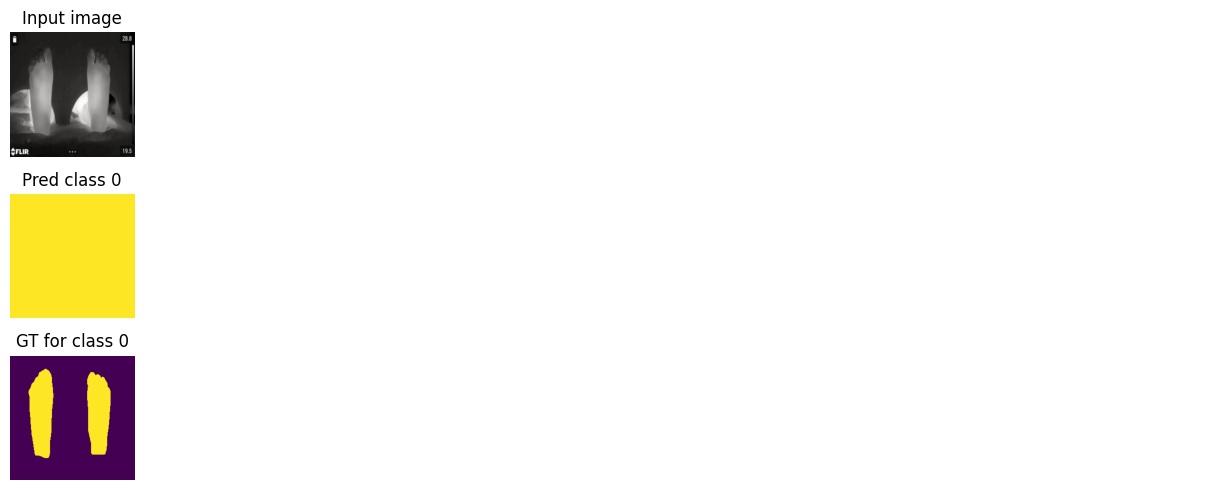

Train loss: 0.70257 | Time: 0m 27s | Val loss: 0.69448
Train_DICE_avg: 0.38184 | Train_Jaccard_avg: 0.24362 | Train_Sensitivity_avg: 0.24362 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38184 | Train_Jaccard: 0.24362 | Train_Sensitivity: 0.24362 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.70198 | Time: 0m 31s | Val loss: 0.69370
Train_DICE_avg: 0.38174 | Train_Jaccard_avg: 0.24351 | Train_Sensitivity_avg: 0.24351 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38174 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24351 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


Train loss: 0.70135 | Time: 0m 36s | Val loss: 0.69259
Train_DICE_avg: 0.38164 | Train_Jaccard_avg: 0.24342 | Train_Sensitivity_avg: 0.24342 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38164 | Train_Jaccard: 0.24342 | Train_Sensitivity: 0.24342 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.70045 | Time: 0m 40s | Val loss: 0.69118
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.69975 | Time: 0m 45s | Val loss: 0.68976
Train_DICE_avg: 0.38168 | Train_Jaccard_avg: 0.24346 | Train_Sensitivity_avg: 0.24346 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38168 | Train_Jaccard: 0.24346 | Train_Sensitivity: 0.24346 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


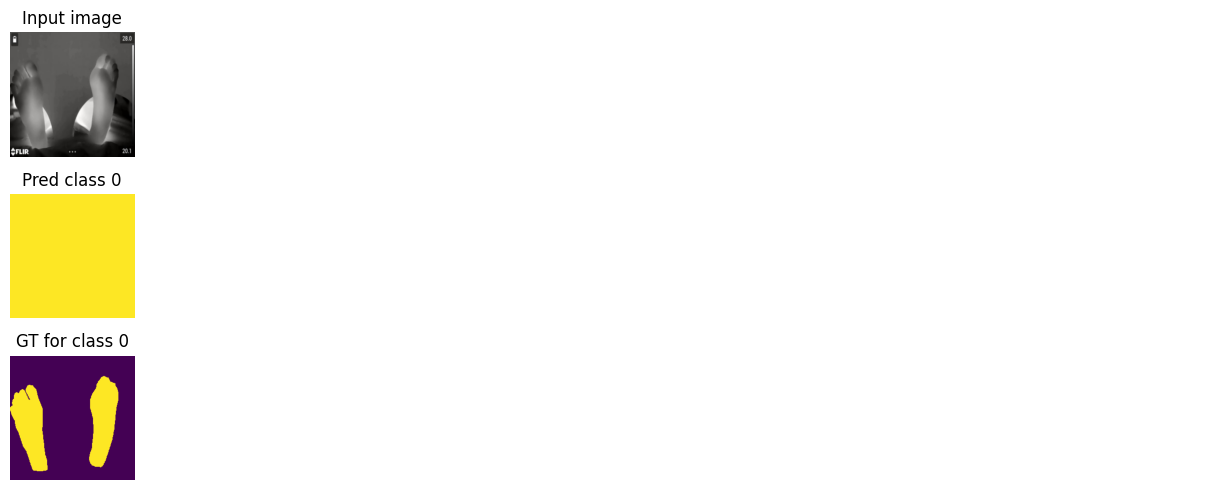

Train loss: 0.69871 | Time: 0m 50s | Val loss: 0.68835
Train_DICE_avg: 0.38189 | Train_Jaccard_avg: 0.24365 | Train_Sensitivity_avg: 0.24365 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38189 | Train_Jaccard: 0.24365 | Train_Sensitivity: 0.24365 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.69824 | Time: 0m 54s | Val loss: 0.68725
Train_DICE_avg: 0.38167 | Train_Jaccard_avg: 0.24345 | Train_Sensitivity_avg: 0.24345 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38167 | Train_Jaccard: 0.24345 | Train_Sensitivity: 0.24345 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.69750 | Time: 0m 59s | Val loss: 0.68632
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.69671 | Time: 1m 4s | Val loss: 0.68551
Train_DICE_avg: 0.38164 | Train_Jaccard_avg: 0.24342 | Train_Sensitivity_avg: 0.24342 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38164 | Train_Jaccard: 0.24342 | Train_Sensitivity: 0.24342 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.69609 | Time: 1m 8s | Val loss: 0.68477
Train_DICE_avg: 0.38175 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38175 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


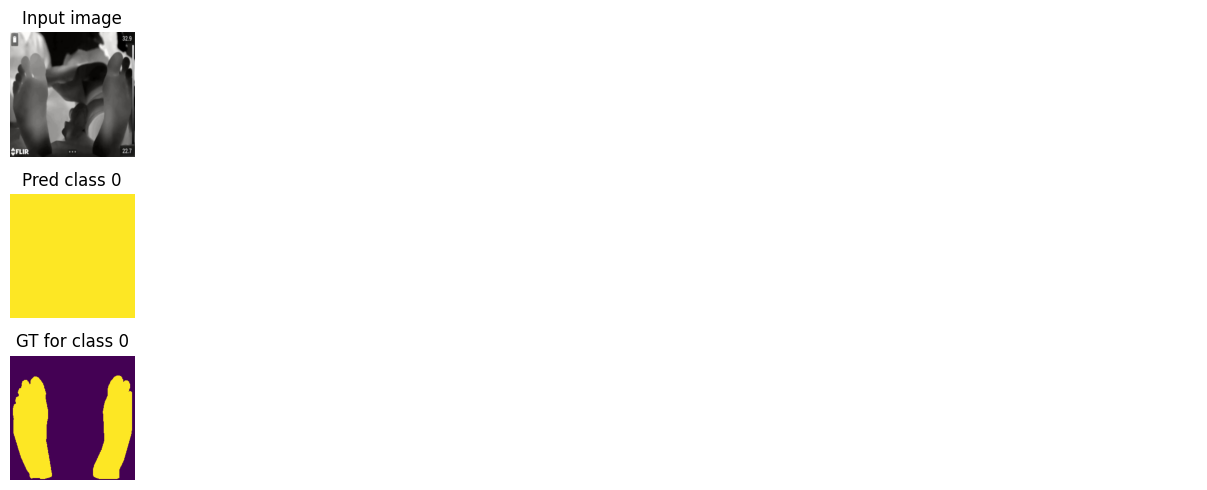

Train loss: 0.69525 | Time: 1m 13s | Val loss: 0.68410
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.69490 | Time: 1m 18s | Val loss: 0.68343
Train_DICE_avg: 0.38166 | Train_Jaccard_avg: 0.24345 | Train_Sensitivity_avg: 0.24345 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38166 | Train_Jaccard: 0.24345 | Train_Sensitivity: 0.24345 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


Train loss: 0.69419 | Time: 1m 22s | Val loss: 0.68278
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


Train loss: 0.69387 | Time: 1m 27s | Val loss: 0.68225
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.69315 | Time: 1m 31s | Val loss: 0.68174
Train_DICE_avg: 0.38167 | Train_Jaccard_avg: 0.24346 | Train_Sensitivity_avg: 0.24346 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38167 | Train_Jaccard: 0.24346 | Train_Sensitivity: 0.24346 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


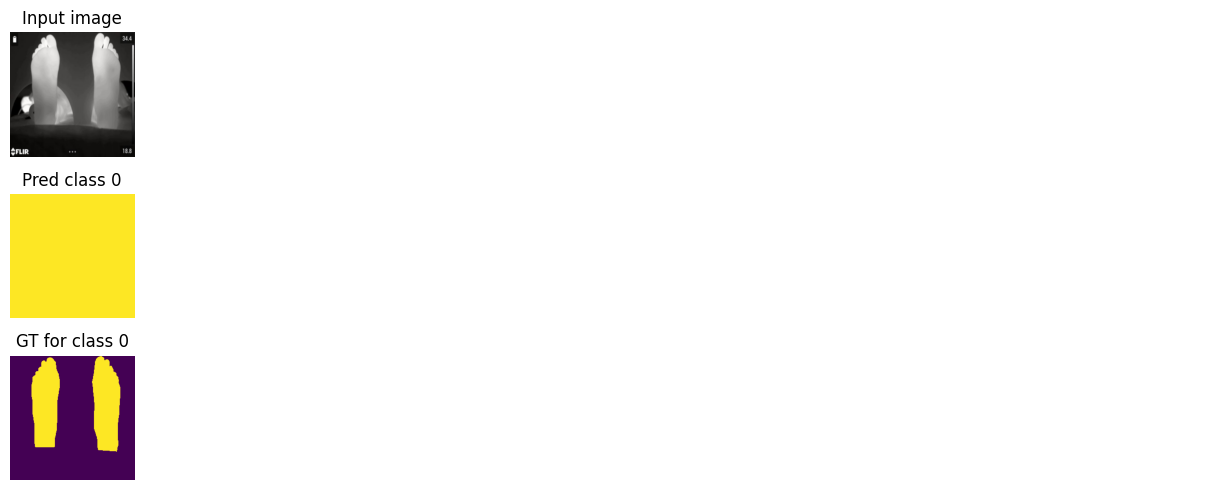

Train loss: 0.69256 | Time: 1m 36s | Val loss: 0.68103
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.69218 | Time: 1m 41s | Val loss: 0.68048
Train_DICE_avg: 0.38160 | Train_Jaccard_avg: 0.24341 | Train_Sensitivity_avg: 0.24341 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38160 | Train_Jaccard: 0.24341 | Train_Sensitivity: 0.24341 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Train loss: 0.69134 | Time: 1m 45s | Val loss: 0.67988
Train_DICE_avg: 0.38189 | Train_Jaccard_avg: 0.24365 | Train_Sensitivity_avg: 0.24365 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38189 | Train_Jaccard: 0.24365 | Train_Sensitivity: 0.24365 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.69092 | Time: 1m 50s | Val loss: 0.67936
Train_DICE_avg: 0.38183 | Train_Jaccard_avg: 0.24360 | Train_Sensitivity_avg: 0.24360 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38183 | Train_Jaccard: 0.24360 | Train_Sensitivity: 0.24360 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.69053 | Time: 1m 54s | Val loss: 0.67883
Train_DICE_avg: 0.38169 | Train_Jaccard_avg: 0.24346 | Train_Sensitivity_avg: 0.24346 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38169 | Train_Jaccard: 0.24346 | Train_Sensitivity: 0.24346 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


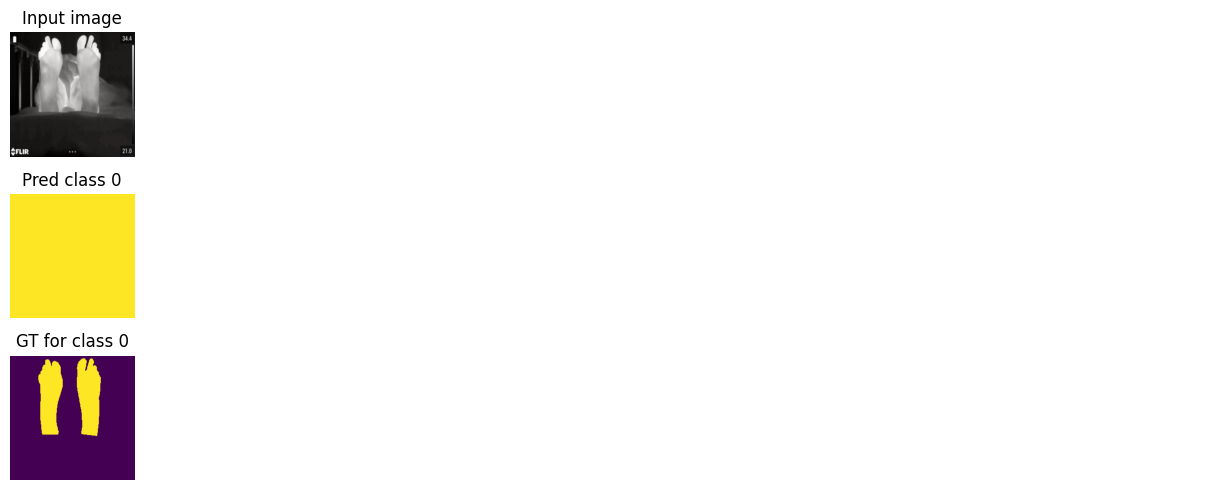

Train loss: 0.69002 | Time: 1m 59s | Val loss: 0.67831
Train_DICE_avg: 0.38165 | Train_Jaccard_avg: 0.24343 | Train_Sensitivity_avg: 0.24343 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38165 | Train_Jaccard: 0.24343 | Train_Sensitivity: 0.24343 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.68949 | Time: 2m 4s | Val loss: 0.67777
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.68904 | Time: 2m 8s | Val loss: 0.67713
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.68822 | Time: 2m 13s | Val loss: 0.67655
Train_DICE_avg: 0.38180 | Train_Jaccard_avg: 0.24357 | Train_Sensitivity_avg: 0.24357 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38180 | Train_Jaccard: 0.24357 | Train_Sensitivity: 0.24357 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.68763 | Time: 2m 17s | Val loss: 0.67595
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


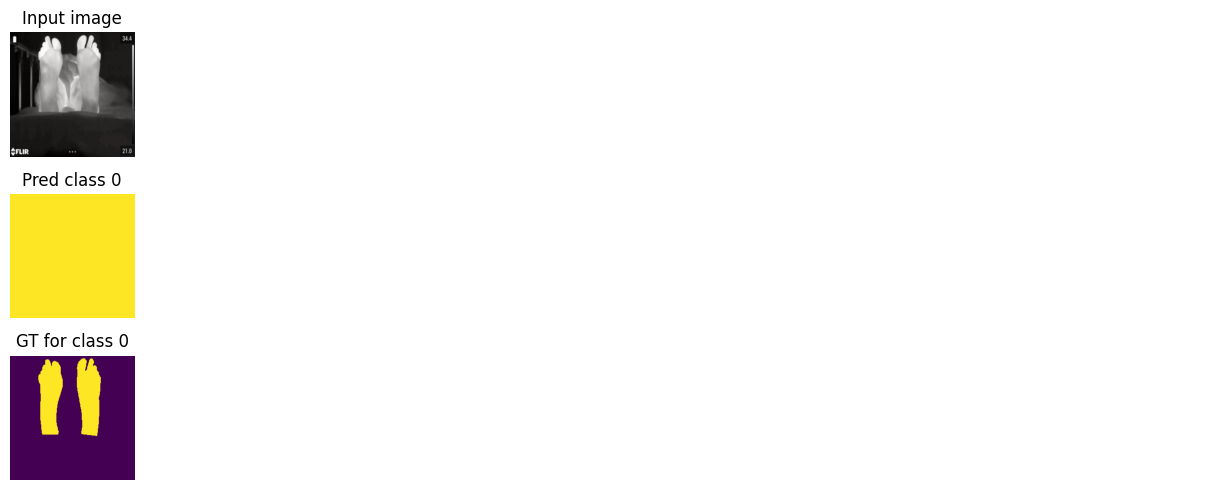

Train loss: 0.68728 | Time: 2m 22s | Val loss: 0.67531
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.68656 | Time: 2m 27s | Val loss: 0.67470
Train_DICE_avg: 0.38181 | Train_Jaccard_avg: 0.24358 | Train_Sensitivity_avg: 0.24358 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38181 | Train_Jaccard: 0.24358 | Train_Sensitivity: 0.24358 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.68607 | Time: 2m 31s | Val loss: 0.67414
Train_DICE_avg: 0.38184 | Train_Jaccard_avg: 0.24361 | Train_Sensitivity_avg: 0.24361 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38184 | Train_Jaccard: 0.24361 | Train_Sensitivity: 0.24361 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.68571 | Time: 2m 36s | Val loss: 0.67364
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.68512 | Time: 2m 41s | Val loss: 0.67310
Train_DICE_avg: 0.38180 | Train_Jaccard_avg: 0.24358 | Train_Sensitivity_avg: 0.24358 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38180 | Train_Jaccard: 0.24358 | Train_Sensitivity: 0.24358 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


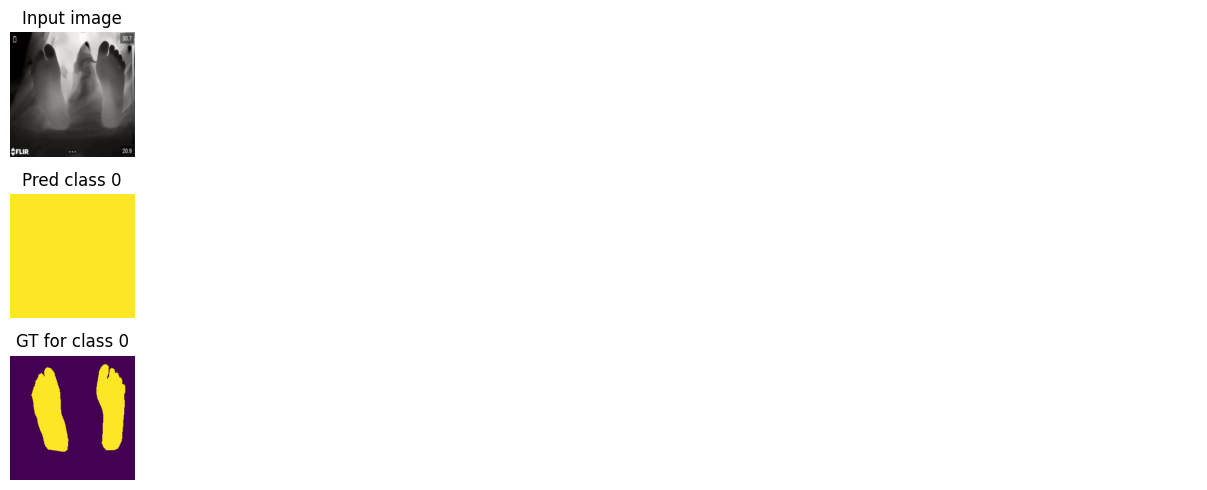

Train loss: 0.68444 | Time: 2m 46s | Val loss: 0.67257
Train_DICE_avg: 0.38171 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38171 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.68392 | Time: 2m 50s | Val loss: 0.67202
Train_DICE_avg: 0.38165 | Train_Jaccard_avg: 0.24345 | Train_Sensitivity_avg: 0.24345 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38165 | Train_Jaccard: 0.24345 | Train_Sensitivity: 0.24345 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.68308 | Time: 2m 55s | Val loss: 0.67141
Train_DICE_avg: 0.38191 | Train_Jaccard_avg: 0.24367 | Train_Sensitivity_avg: 0.24367 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38191 | Train_Jaccard: 0.24367 | Train_Sensitivity: 0.24367 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.68272 | Time: 2m 59s | Val loss: 0.67082
Train_DICE_avg: 0.38170 | Train_Jaccard_avg: 0.24349 | Train_Sensitivity_avg: 0.24349 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38170 | Train_Jaccard: 0.24349 | Train_Sensitivity: 0.24349 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.68239 | Time: 3m 4s | Val loss: 0.67019
Train_DICE_avg: 0.38175 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38175 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


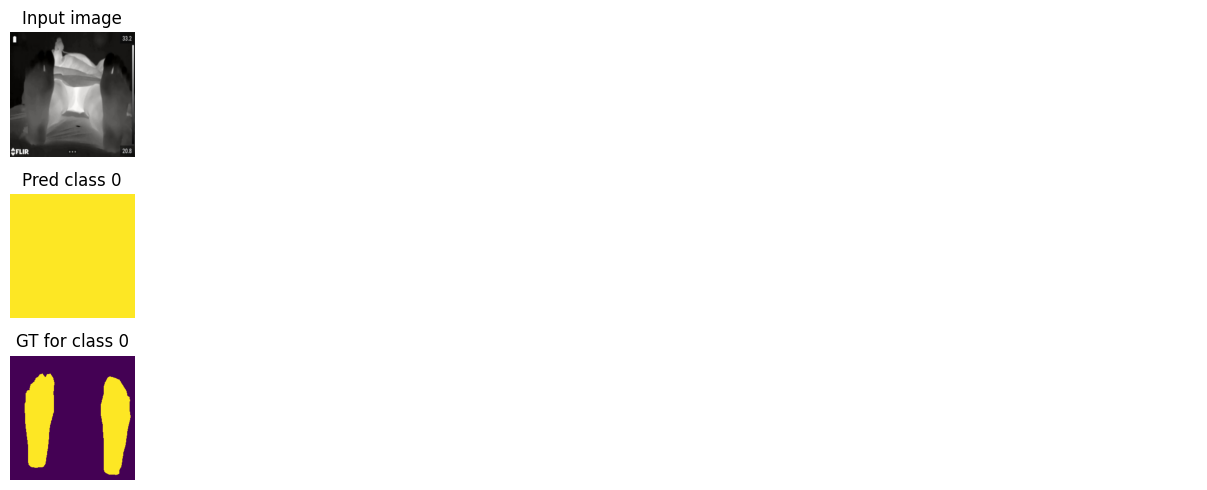

Train loss: 0.68182 | Time: 3m 9s | Val loss: 0.66958
Train_DICE_avg: 0.38169 | Train_Jaccard_avg: 0.24346 | Train_Sensitivity_avg: 0.24346 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38169 | Train_Jaccard: 0.24346 | Train_Sensitivity: 0.24346 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.68106 | Time: 3m 13s | Val loss: 0.66888
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24351 | Train_Sensitivity_avg: 0.24351 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24351 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


Train loss: 0.68028 | Time: 3m 18s | Val loss: 0.66806
Train_DICE_avg: 0.38190 | Train_Jaccard_avg: 0.24366 | Train_Sensitivity_avg: 0.24366 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38190 | Train_Jaccard: 0.24366 | Train_Sensitivity: 0.24366 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


Train loss: 0.67978 | Time: 3m 22s | Val loss: 0.66753
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24358 | Train_Sensitivity_avg: 0.24358 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24358 | Train_Sensitivity: 0.24358 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


Train loss: 0.67904 | Time: 3m 27s | Val loss: 0.66674
Train_DICE_avg: 0.38175 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38175 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


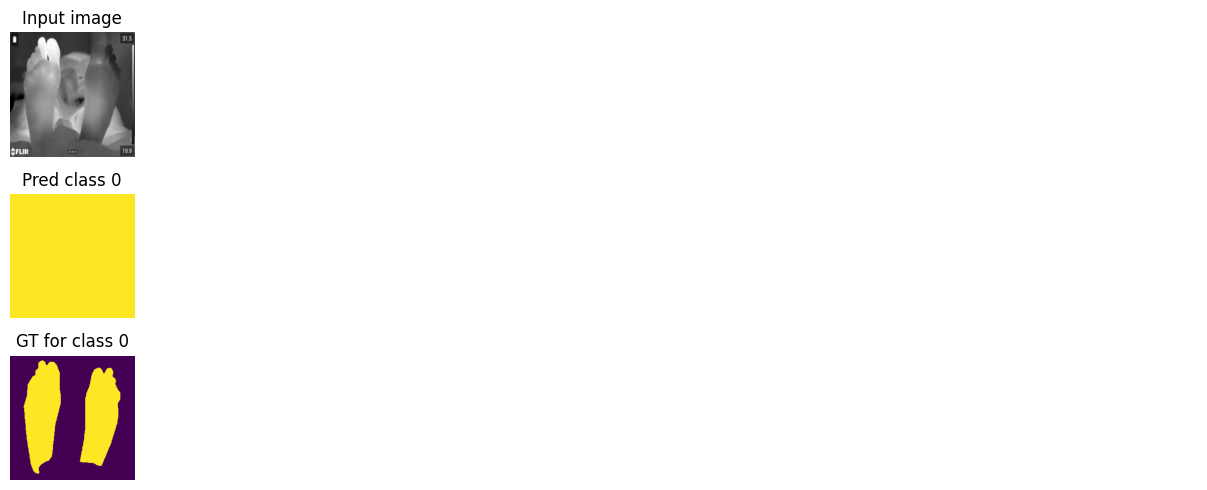

Train loss: 0.67832 | Time: 3m 32s | Val loss: 0.66597
Train_DICE_avg: 0.38172 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38172 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.67767 | Time: 3m 36s | Val loss: 0.66526
Train_DICE_avg: 0.38185 | Train_Jaccard_avg: 0.24362 | Train_Sensitivity_avg: 0.24362 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38185 | Train_Jaccard: 0.24362 | Train_Sensitivity: 0.24362 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.67749 | Time: 3m 41s | Val loss: 0.66452
Train_DICE_avg: 0.38168 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38168 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


Train loss: 0.67663 | Time: 3m 46s | Val loss: 0.66391
Train_DICE_avg: 0.38166 | Train_Jaccard_avg: 0.24344 | Train_Sensitivity_avg: 0.24344 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38166 | Train_Jaccard: 0.24344 | Train_Sensitivity: 0.24344 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.67593 | Time: 3m 50s | Val loss: 0.66323
Train_DICE_avg: 0.38177 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38177 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


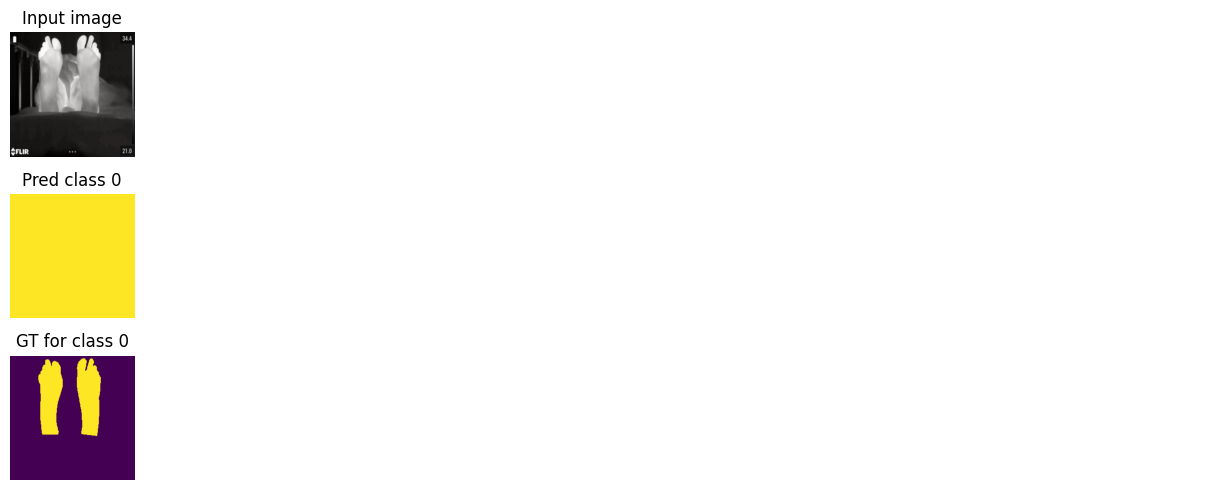

Train loss: 0.67529 | Time: 3m 55s | Val loss: 0.66250
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.67484 | Time: 4m 0s | Val loss: 0.66182
Train_DICE_avg: 0.38175 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38175 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.67404 | Time: 4m 4s | Val loss: 0.66135
Train_DICE_avg: 0.38173 | Train_Jaccard_avg: 0.24350 | Train_Sensitivity_avg: 0.24350 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38173 | Train_Jaccard: 0.24350 | Train_Sensitivity: 0.24350 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


Train loss: 0.67363 | Time: 4m 9s | Val loss: 0.66078
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24355 | Train_Sensitivity_avg: 0.24355 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24355 | Train_Sensitivity: 0.24355 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


Train loss: 0.67275 | Time: 4m 14s | Val loss: 0.66020
Train_DICE_avg: 0.38169 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38169 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


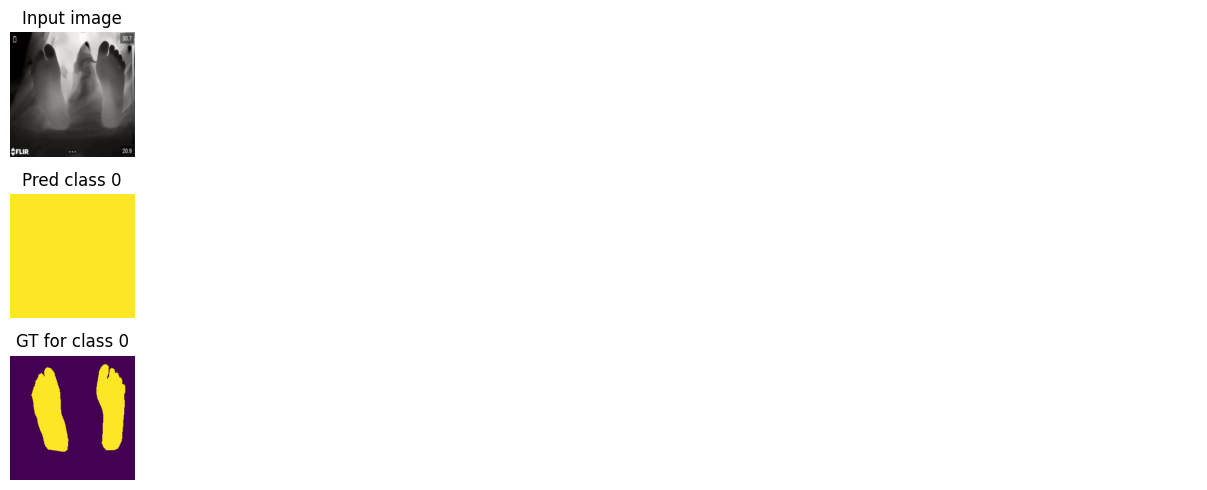

Train loss: 0.67228 | Time: 4m 19s | Val loss: 0.65964
Train_DICE_avg: 0.38178 | Train_Jaccard_avg: 0.24354 | Train_Sensitivity_avg: 0.24354 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38178 | Train_Jaccard: 0.24354 | Train_Sensitivity: 0.24354 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.67215 | Time: 4m 23s | Val loss: 0.65905
Train_DICE_avg: 0.38168 | Train_Jaccard_avg: 0.24345 | Train_Sensitivity_avg: 0.24345 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38168 | Train_Jaccard: 0.24345 | Train_Sensitivity: 0.24345 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.67140 | Time: 4m 28s | Val loss: 0.65857
Train_DICE_avg: 0.38176 | Train_Jaccard_avg: 0.24352 | Train_Sensitivity_avg: 0.24352 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38176 | Train_Jaccard: 0.24352 | Train_Sensitivity: 0.24352 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.67089 | Time: 4m 32s | Val loss: 0.65821
Train_DICE_avg: 0.38169 | Train_Jaccard_avg: 0.24347 | Train_Sensitivity_avg: 0.24347 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38169 | Train_Jaccard: 0.24347 | Train_Sensitivity: 0.24347 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.67068 | Time: 4m 37s | Val loss: 0.65783
Train_DICE_avg: 0.38174 | Train_Jaccard_avg: 0.24353 | Train_Sensitivity_avg: 0.24353 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38174 | Train_Jaccard: 0.24353 | Train_Sensitivity: 0.24353 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


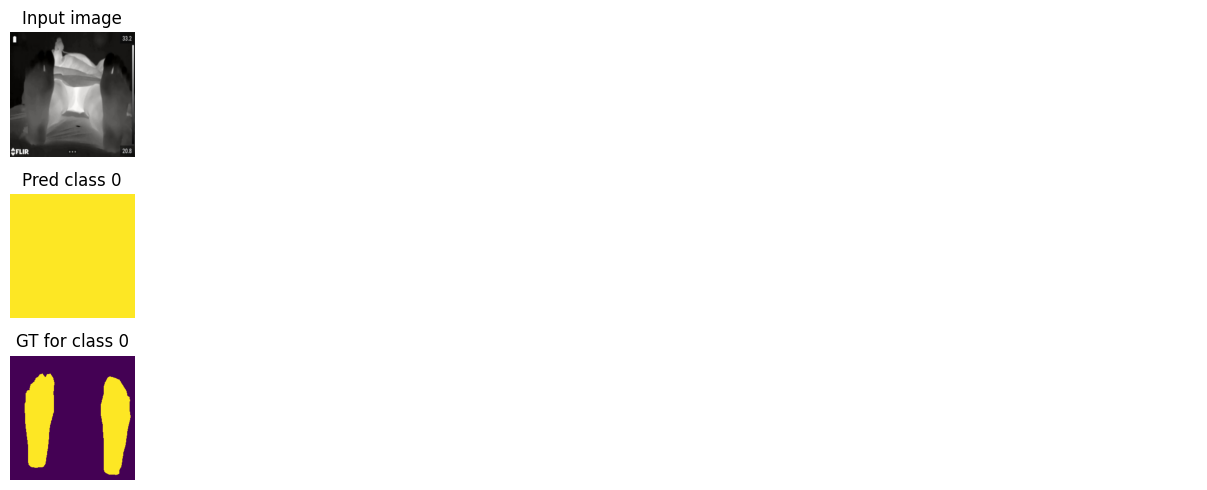

Train loss: 0.67031 | Time: 4m 42s | Val loss: 0.65742
Train_DICE_avg: 0.38167 | Train_Jaccard_avg: 0.24346 | Train_Sensitivity_avg: 0.24346 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.38167 | Train_Jaccard: 0.24346 | Train_Sensitivity: 0.24346 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39349 | Val_Jaccard_avg: 0.25504 | Val_Sensitivity_avg: 0.25504 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39349 | Val_Jaccard: 0.25504 | Val_Sensitivity: 0.25504 | Val_Specificity: 1.00000 


Training DICE,▄▆▄▃▄▃█▄▅▃▄▁█▆▃▅▅▅▃▆▃▆▃▂▃▃▄█▅▄▇▃▂▅▄▅▃▅▃▂
Training Jaccard,▃▃▄▁▄█▂▄▁▄▂▅▃▃▁▇▃▂▅▄▃▆▇▃▂▃▄▃▆▄▃▂▅▄▅▅▅▄▃▂
Training Loss,██▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
Training Sensitivity,▃▃▄▁▃█▂▄▁▄▂▅▃▂▃█▂▁▅▄▅▃▆▆▃▃▄▂▄█▇▃▂▅▄▅▂▅▂▄
Training Specificity,▁███████████████████████████████████████
Validation DICE,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Jaccard,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Loss,█████▇▇▇▇▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
Validation Sensitivity,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Specificity,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training DICE,0.38167



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Global Performance Metrics:
Loss mean: 0.70709, std: 0.00000
Dice Coefficient mean: 0.37976, std: 0.14268
Jaccard Index mean: 0.24430, std: 0.11303
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.00002, std: 0.00000

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.37976, std: 0.14268
Jaccard mean: 0.24430, std: 0.11303
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.00002, std: 0.00000
